In [3]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

# figure size in inches
pd.options.display.max_columns = 100
pd.options.display.max_rows = 5

In [4]:
DATA_PATH = 'data/gsom/gsom-latest'
data_dir = os.listdir(DATA_PATH)
print("[*] Number of data:", len(data_dir))

[*] Number of data: 115904


In [5]:
ASN_data = []
for csv_file in data_dir:
    if 'USW' in csv_file:
        ASN_data.append(os.path.join(DATA_PATH, csv_file))
print('[*] Number of ASN data:', len(ASN_data))

[*] Number of ASN data: 1740


In [6]:
# Take first 1000 csv data
ASN_data = ASN_data[:50]

In [7]:
df = pd.concat(map(pd.read_csv, ASN_data), ignore_index=True)[:1000]
for col in df.columns:
    df[col] = df[col].interpolate(method='bfill')
    df[col] = df[col].interpolate(method='nearest')
df

STATION     DATE  LATITUDE  LONGITUDE  ELEVATION  \
0    USW00093005  1996-07  37.14310 -107.76023     2020.6   
1    USW00093005  1996-08  37.14310 -107.76023     2020.6   
..           ...      ...       ...        ...        ...   
998  USW00024023  1981-10  41.12199 -100.66895      841.9   
999  USW00024023  1981-11  41.12199 -100.66895      841.9   

                                     NAME  AWND AWND_ATTRIBUTES   CDSD  \
0      DURANGO LA PLATA CO AIRPORT, CO US   3.2              ,W    0.0   
1      DURANGO LA PLATA CO AIRPORT, CO US   3.2              ,W    0.0   
..                                    ...   ...             ...    ...   
998  NORTH PLATTE REGIONAL AIRPORT, NE US   NaN             NaN  355.5   
999  NORTH PLATTE REGIONAL AIRPORT, NE US   NaN             NaN  355.5   

    CDSD_ATTRIBUTES  CLDD CLDD_ATTRIBUTES  DP01 DP01_ATTRIBUTES  DP10  \
0                 M  82.5             3,M   2.0              ,W   0.0   
1                 M  55.1             1,M   2.0              ,W   0.0   
..              ...   ...             ...   ...             ...   ...   
998               0   0.5              ,0   5.0              ,0   1.0   
999               0   0.0              ,0   6.0              ,0   4.0   

    DP10_ATTRIBUTES  DP1X DP1X_ATTRIBUTES  DT00 DT00_ATTRIBUTES  DT32  \
0                ,W   0.0              ,W   0.0             3,M   0.0   
1                ,W   0.0              ,W   0.0             1,M   0.0   
..              ...   ...             ...   ...             ...   ...   
998              ,0   0.0              ,0   0.0              ,0  12.0   
999              ,0   0.0              ,0   0.0              ,0  26.0   

    DT32_ATTRIBUTES  DX32 DX32_ATTRIBUTES  DX70 DX70_ATTRIBUTES  DX90  \
0               3,M   0.0             3,M  28.0             3,M  10.0   
1               1,M   0.0             1,M  30.0             1,M   5.0   
..              ...   ...             ...   ...             ...   ...   
998              ,0   0.0              ,0  12.0              ,0   0.0   
999              ,0   1.0              ,0   2.0              ,0   0.0   

    DX90_ATTRIBUTES  DYFG  DYFG_ATTRIBUTES  DYHF  DYHF_ATTRIBUTES  DYTS  \
0               3,M   7.0              NaN   4.0              NaN   1.0   
1               1,M   7.0              NaN   4.0              NaN   1.0   
..              ...   ...              ...   ...              ...   ...   
998              ,0  11.0              NaN   2.0              NaN   1.0   
999              ,0  11.0              NaN   6.0              NaN   NaN   

     DYTS_ATTRIBUTES  EMNT EMNT_ATTRIBUTES  EMXP EMXP_ATTRIBUTES  EMXT  \
0                NaN   7.8         3,M,21,   0.3        ,,W,03,+  33.9   
1                NaN   5.0         1,M,05,   0.3        ,,W,03,+  33.9   
..               ...   ...             ...   ...             ...   ...   
998              NaN -10.6          ,0,23,  10.2         ,,0,16,  25.6   
999              NaN -11.1          ,0,19,  25.1         ,,0,30,  22.2   

    EMXT_ATTRIBUTES   HDSD HDSD_ATTRIBUTES   HTDD HTDD_ATTRIBUTES  PRCP  \
0          3,M,31,+    0.3               M    0.3             3,M   0.6   
1          1,M,13,+    4.2               M    3.9             1,M   0.6   
..              ...    ...             ...    ...             ...   ...   
998          ,0,02,  343.3               0  276.8              ,0  15.3   
999          ,0,17,  762.9               0  419.6              ,0  49.2   

    PRCP_ATTRIBUTES   TAVG TAVG_ATTRIBUTES   TMAX TMAX_ATTRIBUTES   TMIN  \
0              ,,,W  21.27             3,M  30.72           3,,,M  11.82   
1              ,,,W  20.04             1,M  29.32           1,,,M  10.76   
..              ...    ...             ...    ...             ...    ...   
998            ,,,0   9.42              ,0  17.24            ,,,0   1.60   
999            ,,,0   4.35              ,0  12.26            ,,,0  -3.57   

    TMIN_ATTRIBUTES     TSUN TSUN_ATTRIBUTES   WDF2 WDF2_ATTRIBUTES   WDF5  

In [8]:
valid_columns = []
for col in df.columns:
    if 'ATTRIBUTES' not in col and col not in ['TMIN', 'TMAX', 'TAVG'] and df[col].dtype == np.float64:
        valid_columns.append(col)
len(valid_columns)

40

/tmp/ipykernel_85752/1600669975.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3)


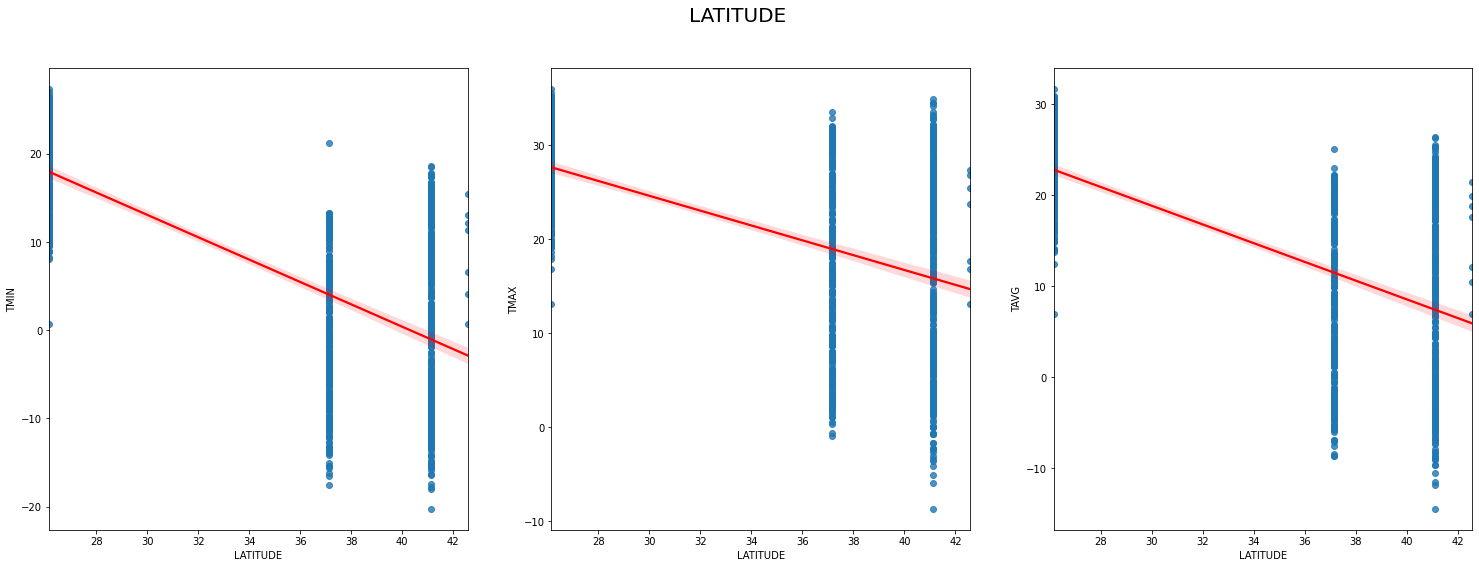

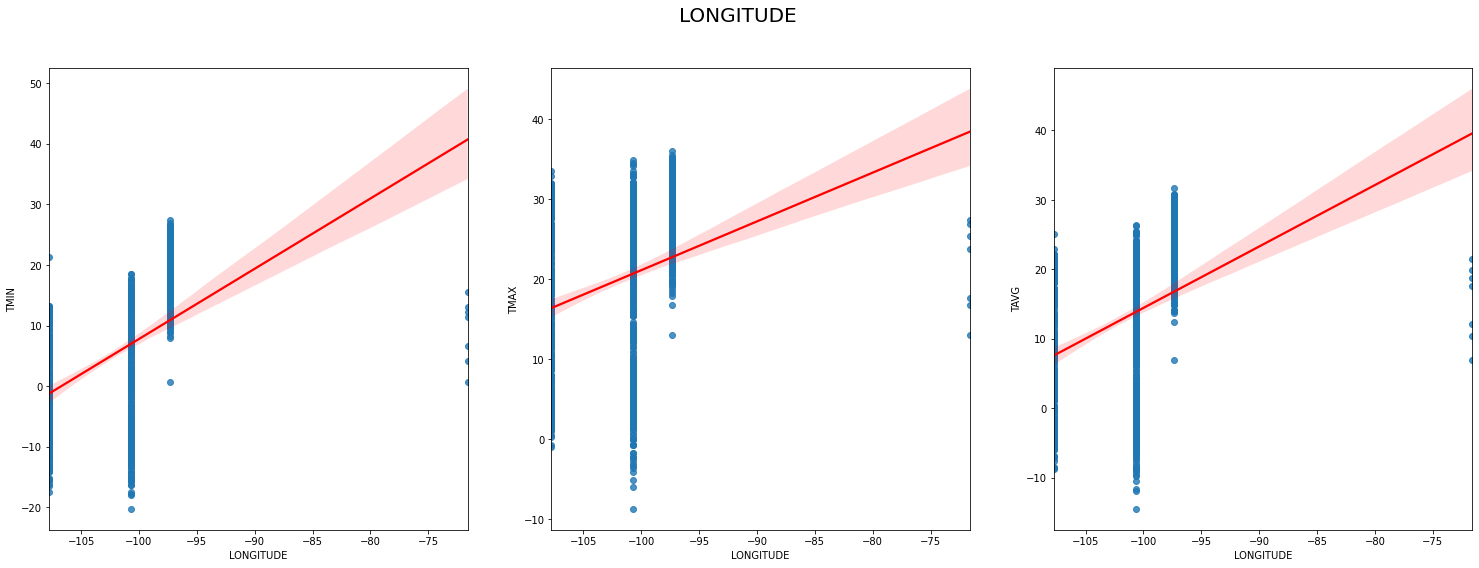

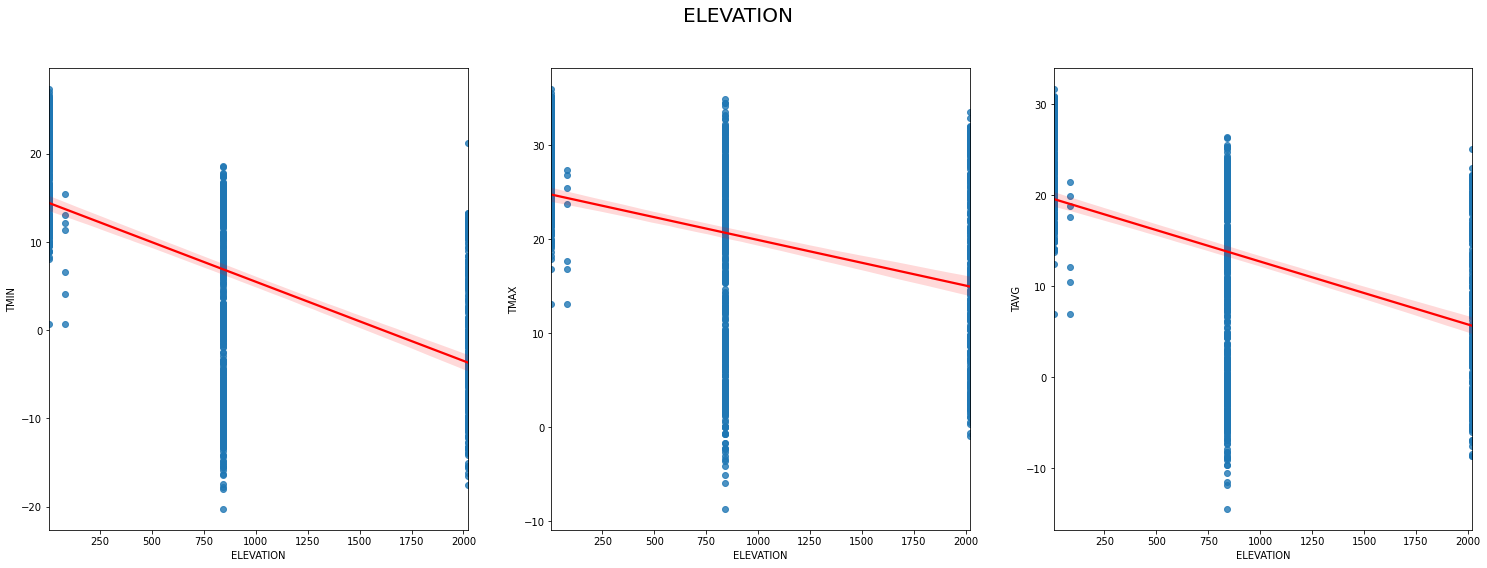

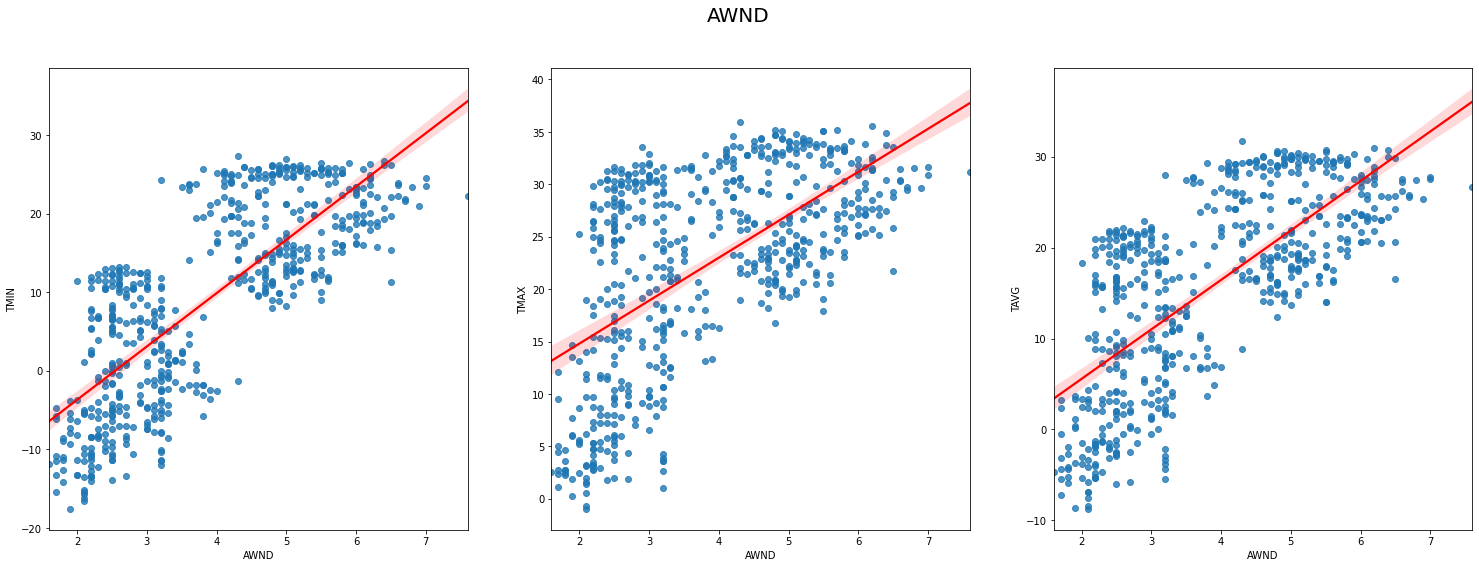

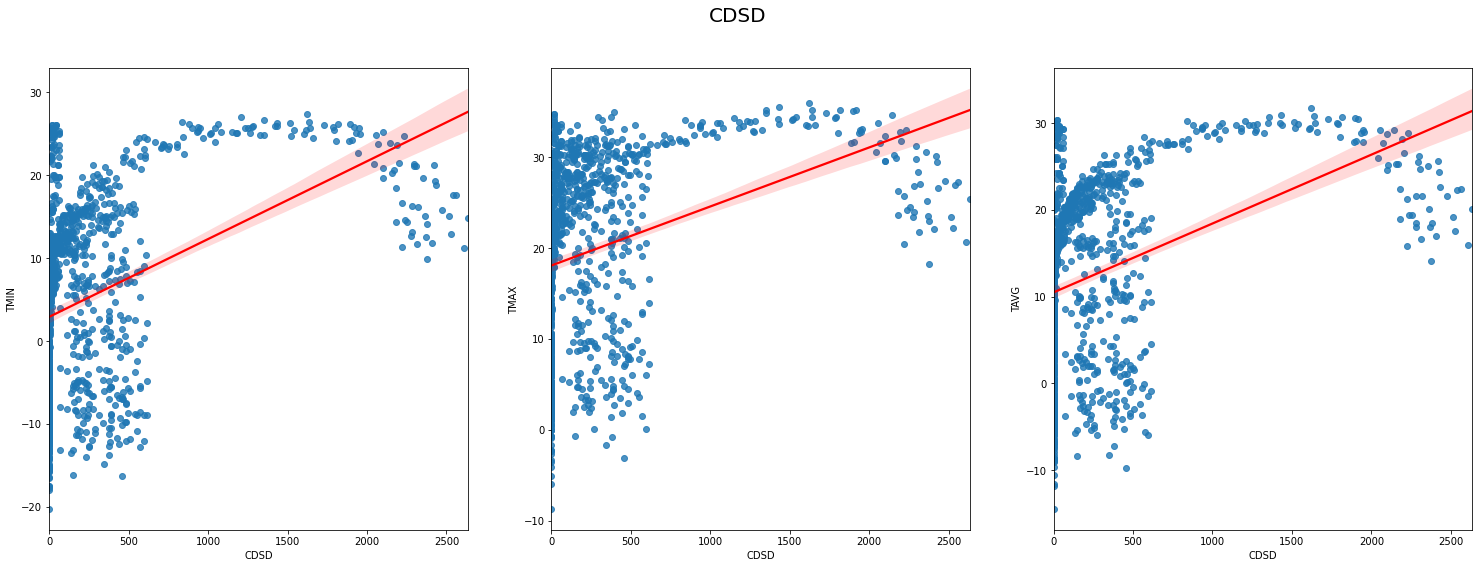

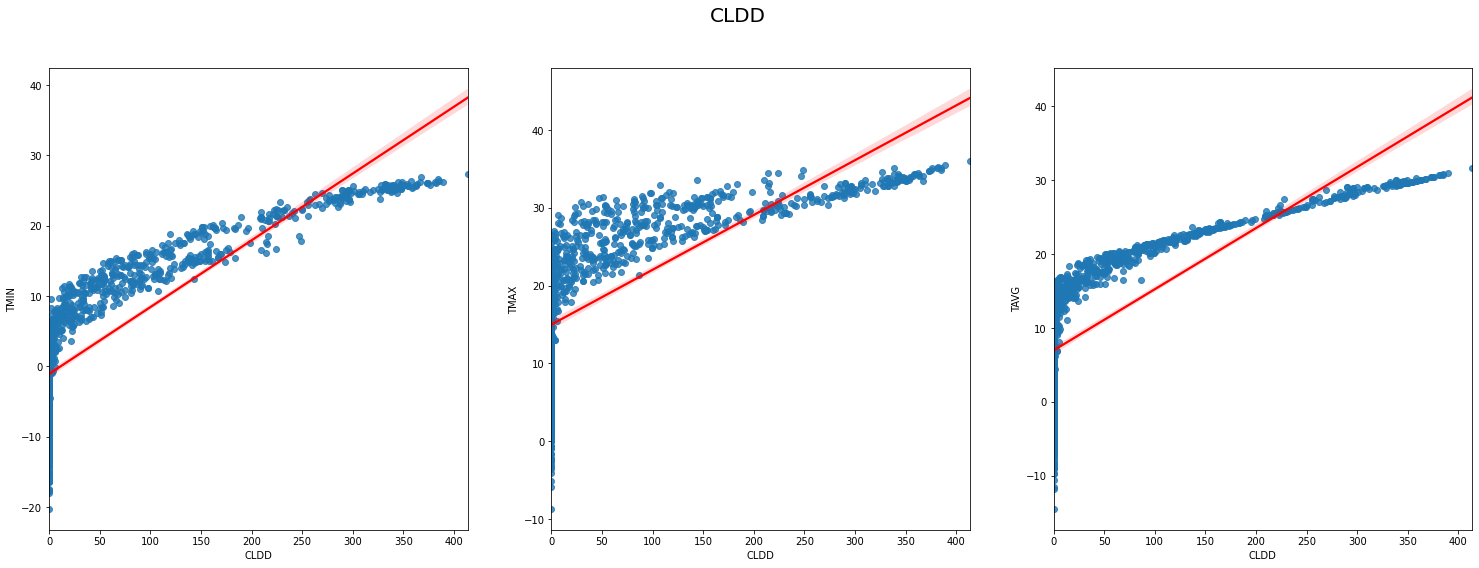

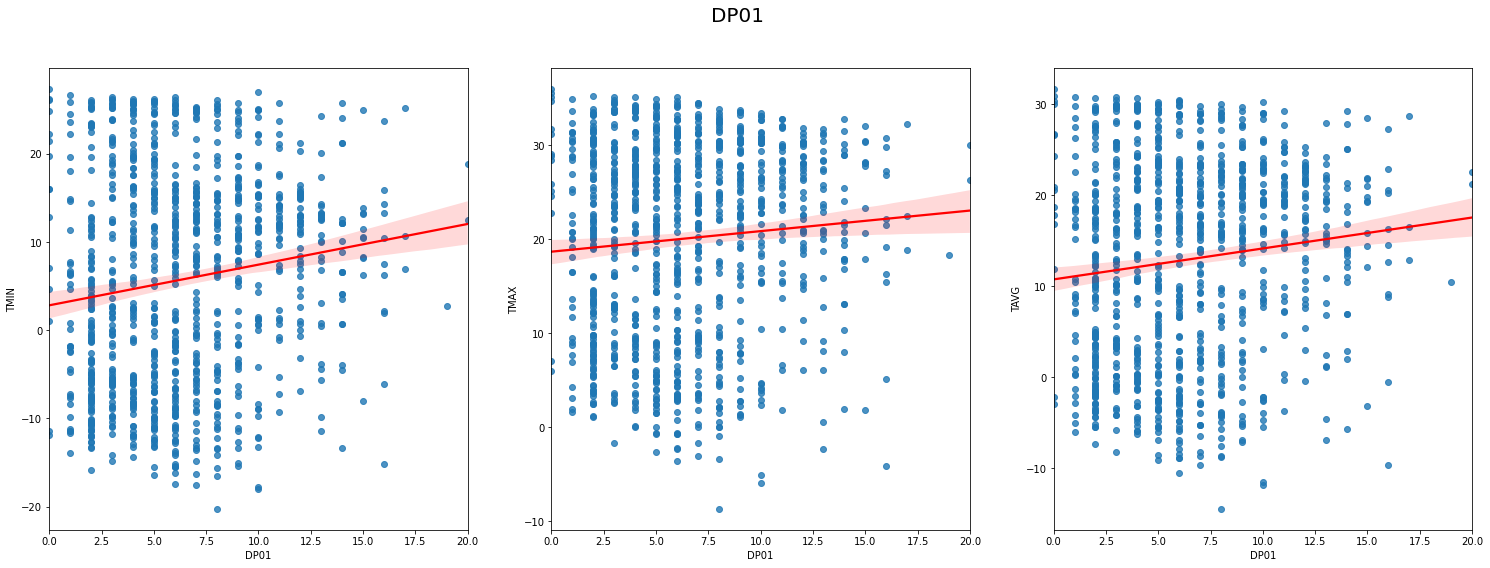

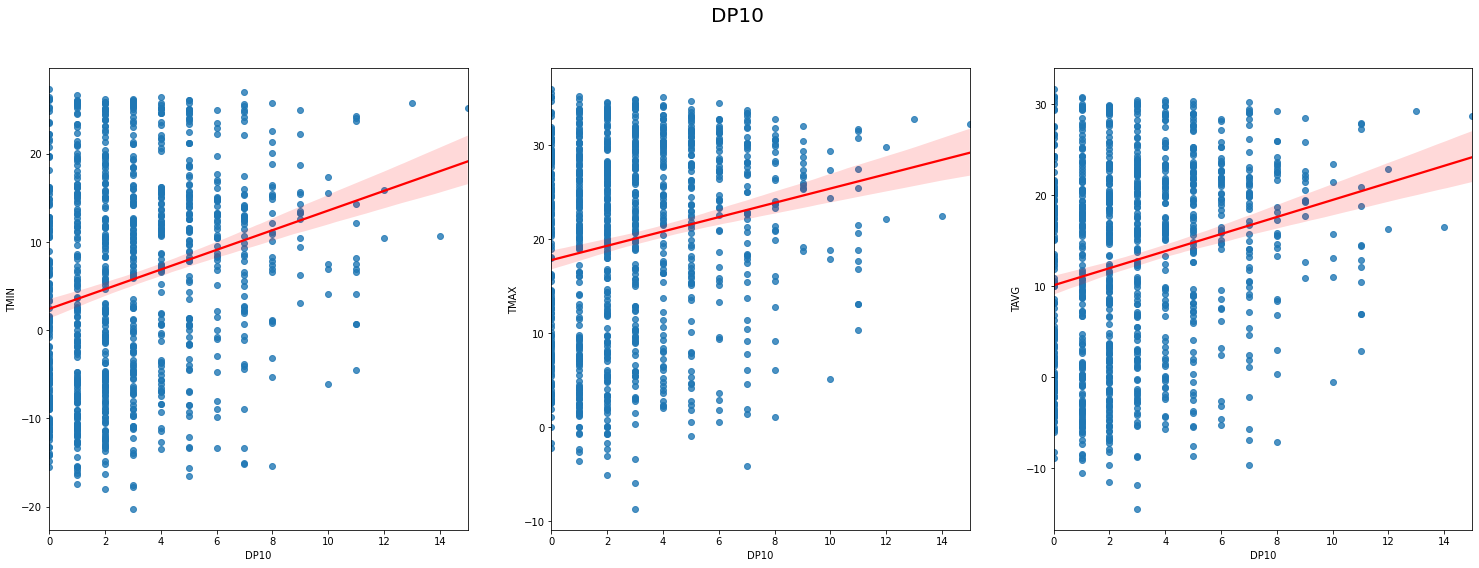

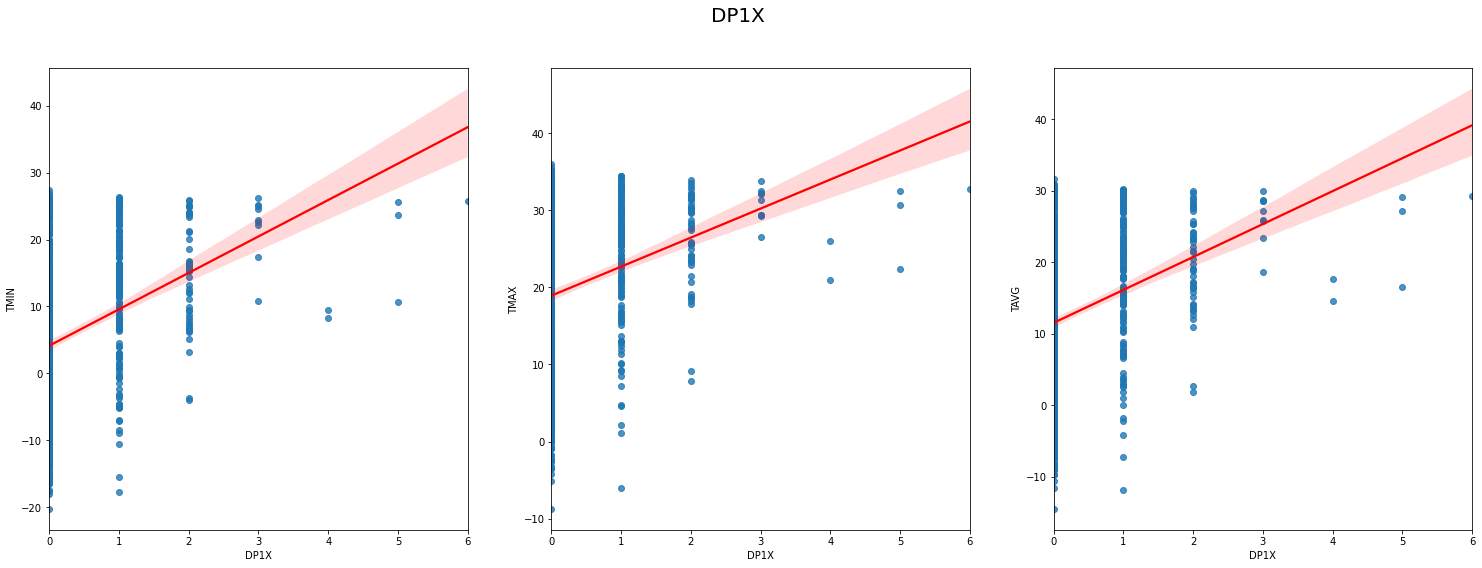

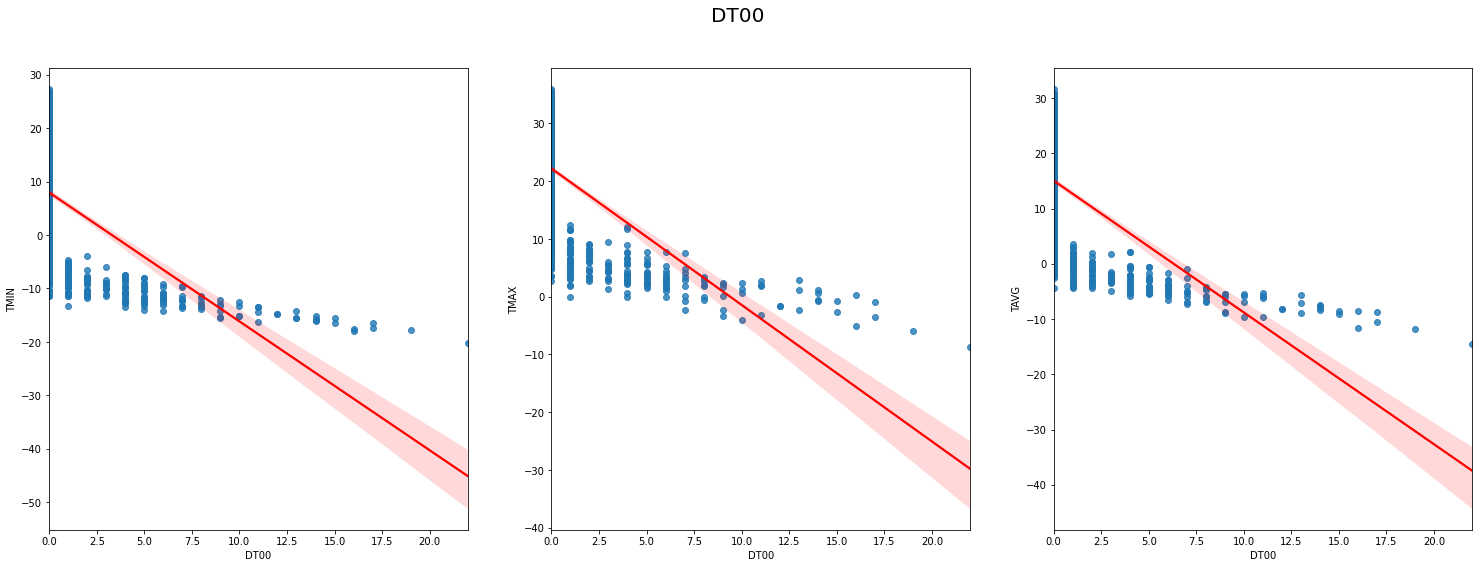

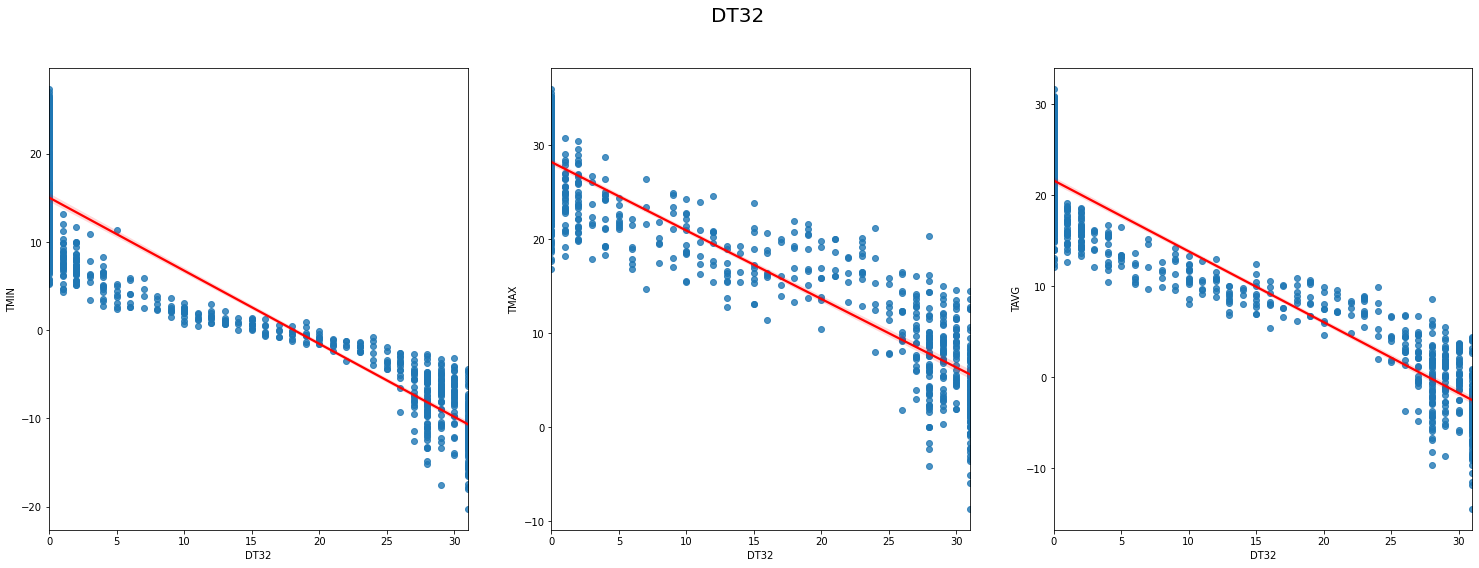

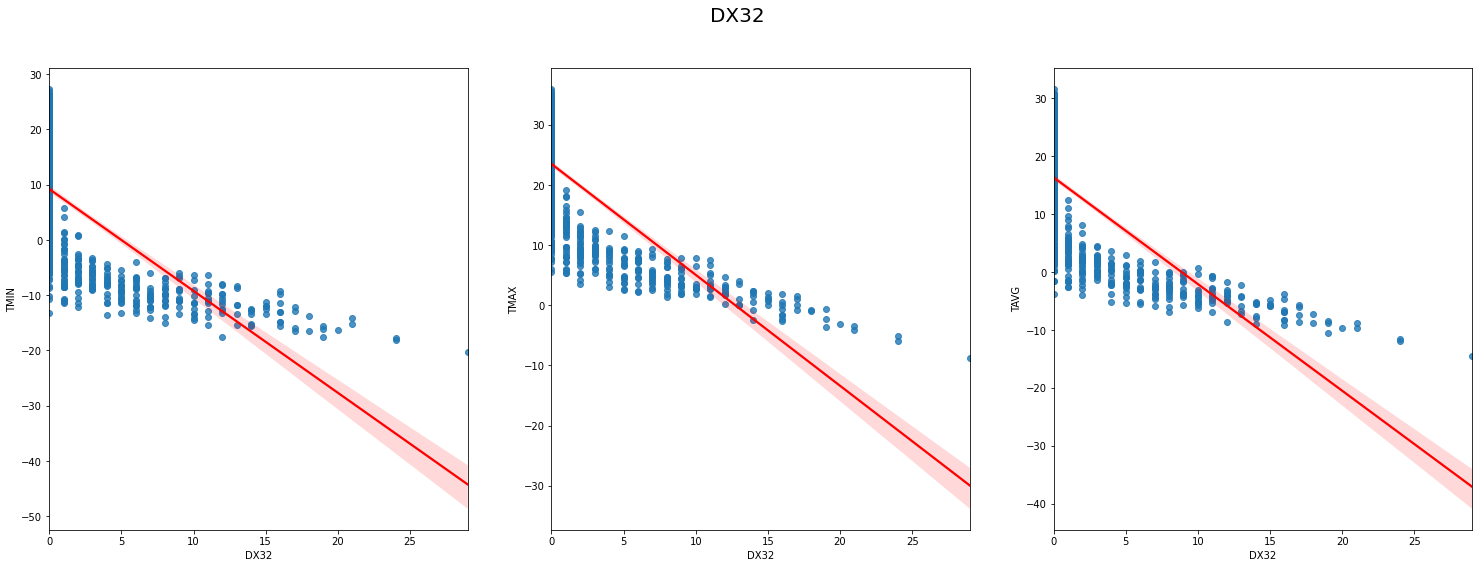

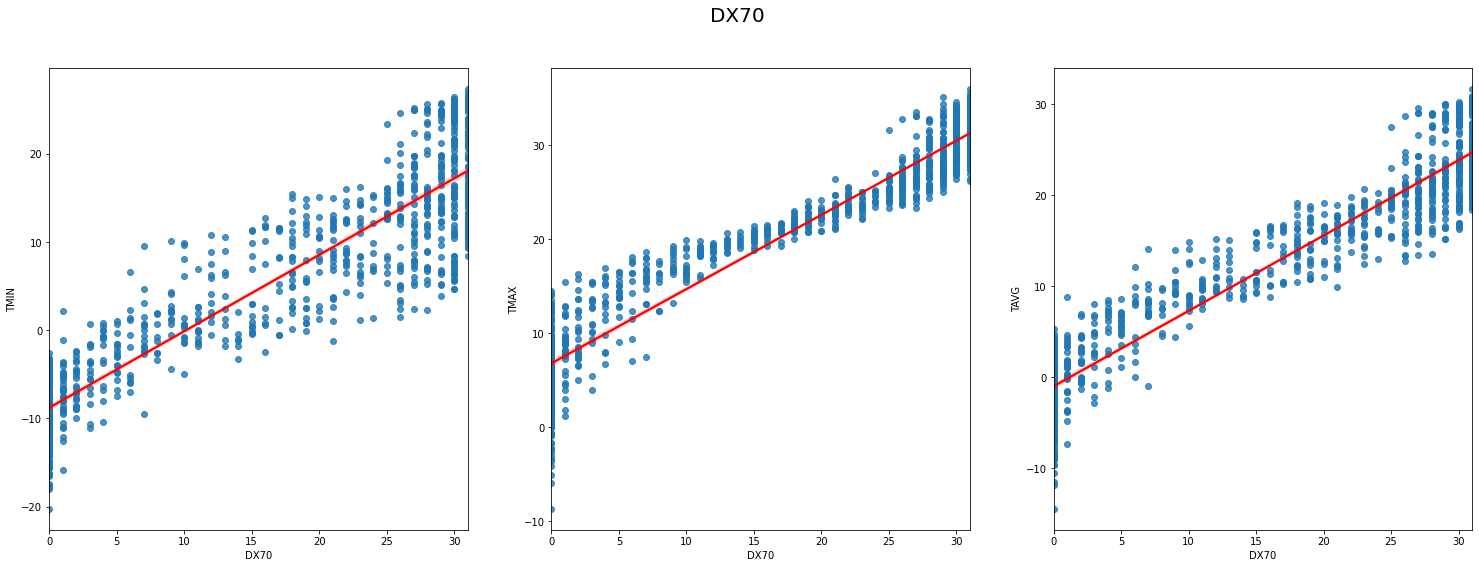

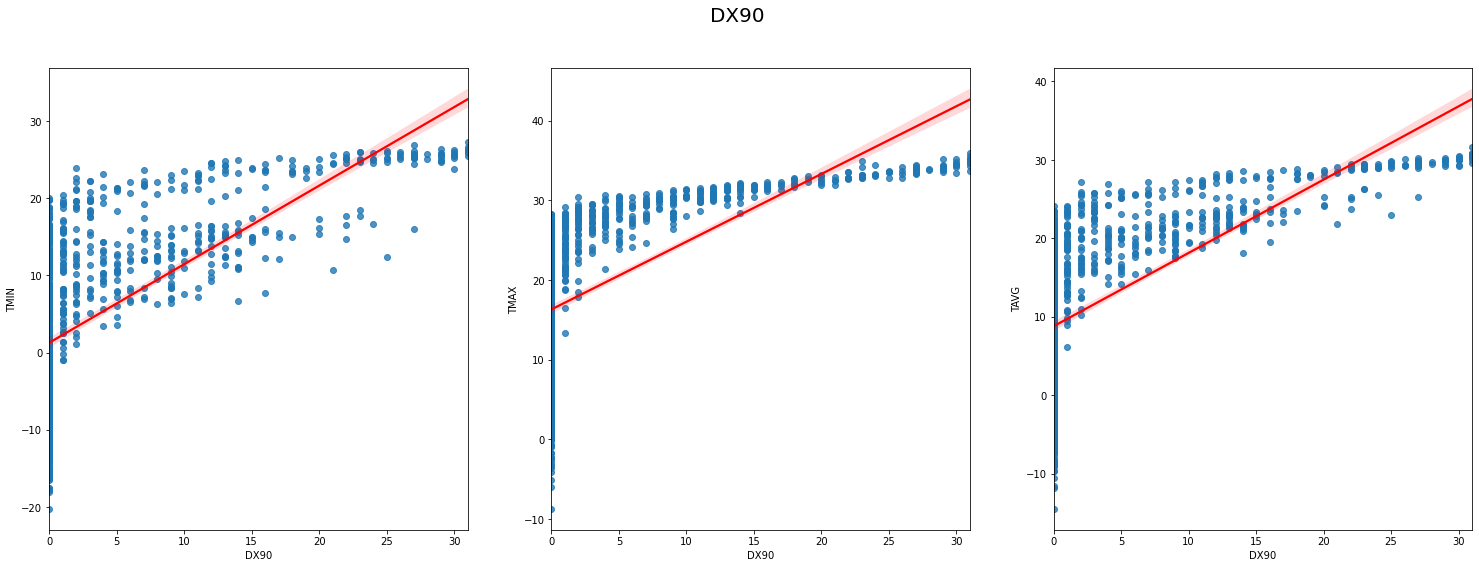

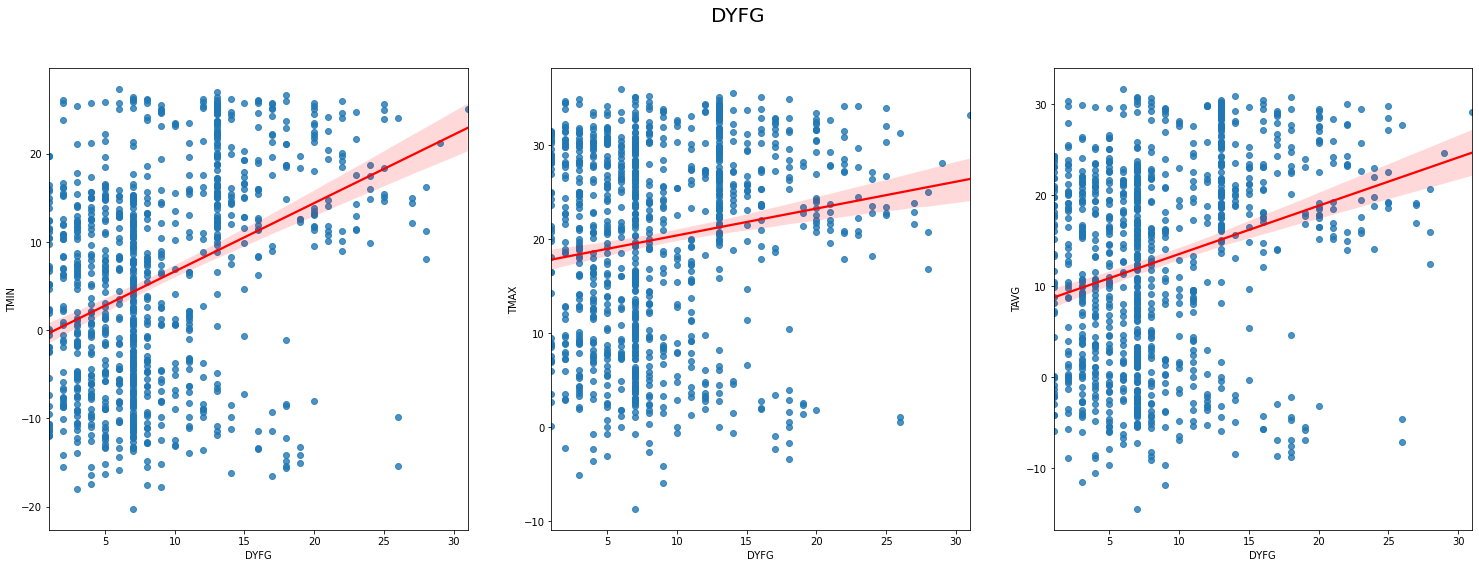

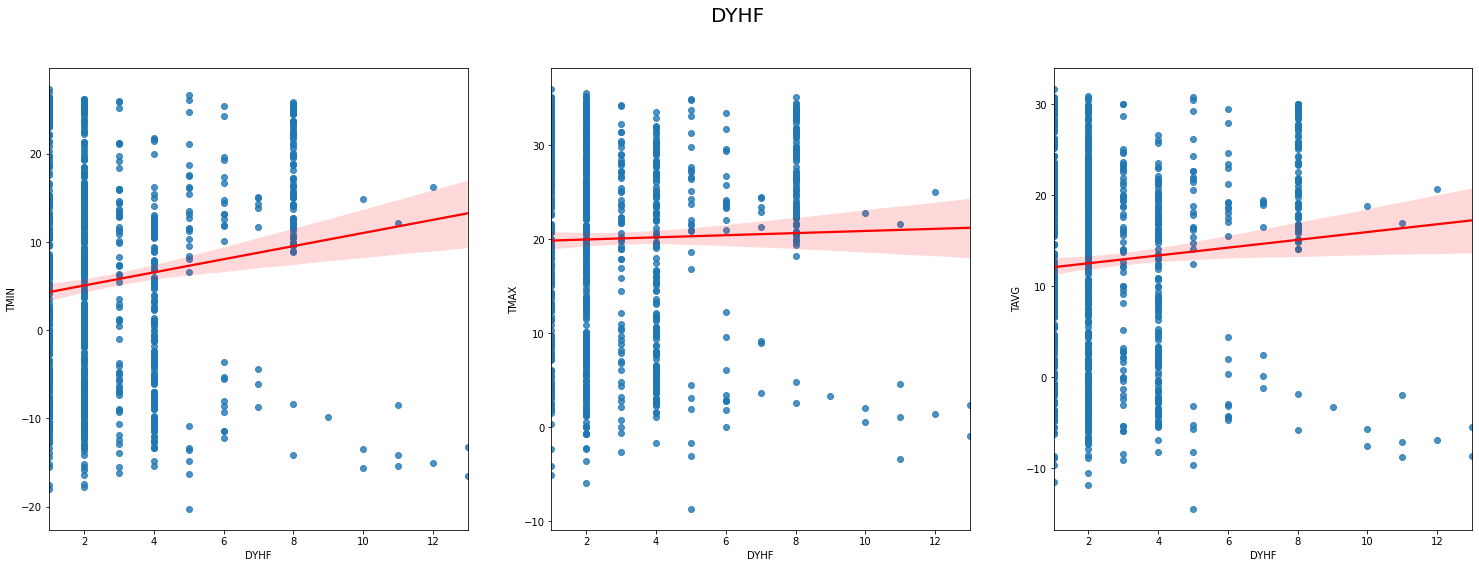

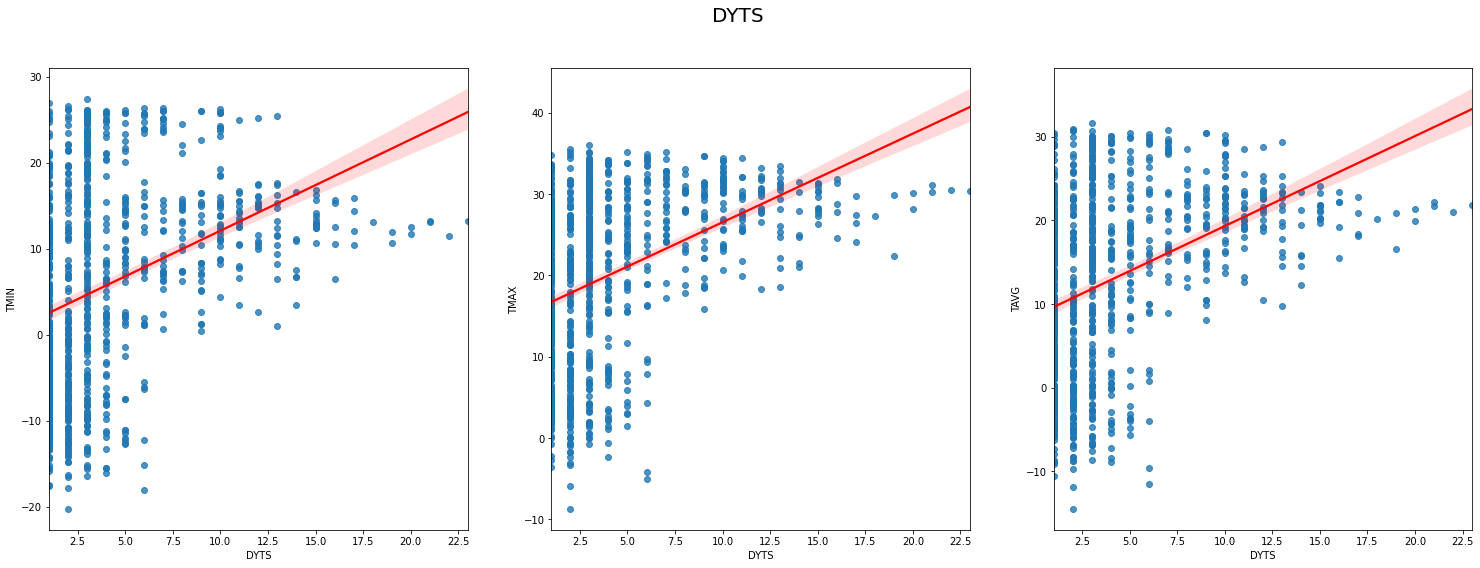

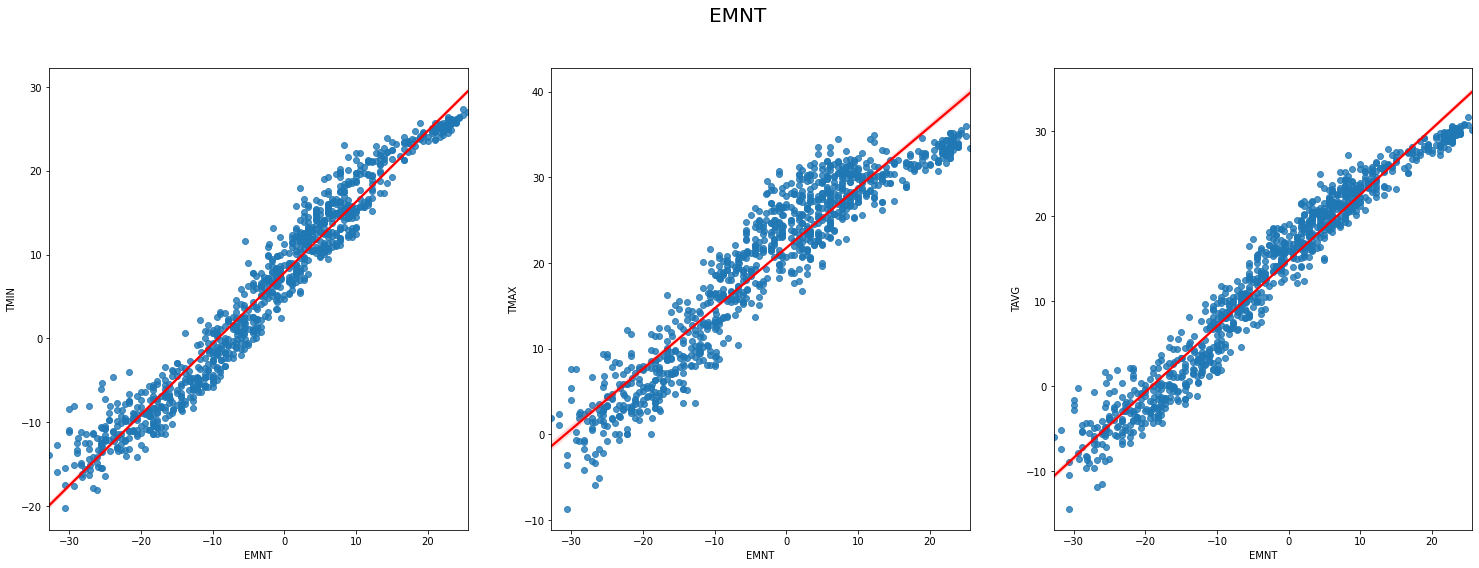

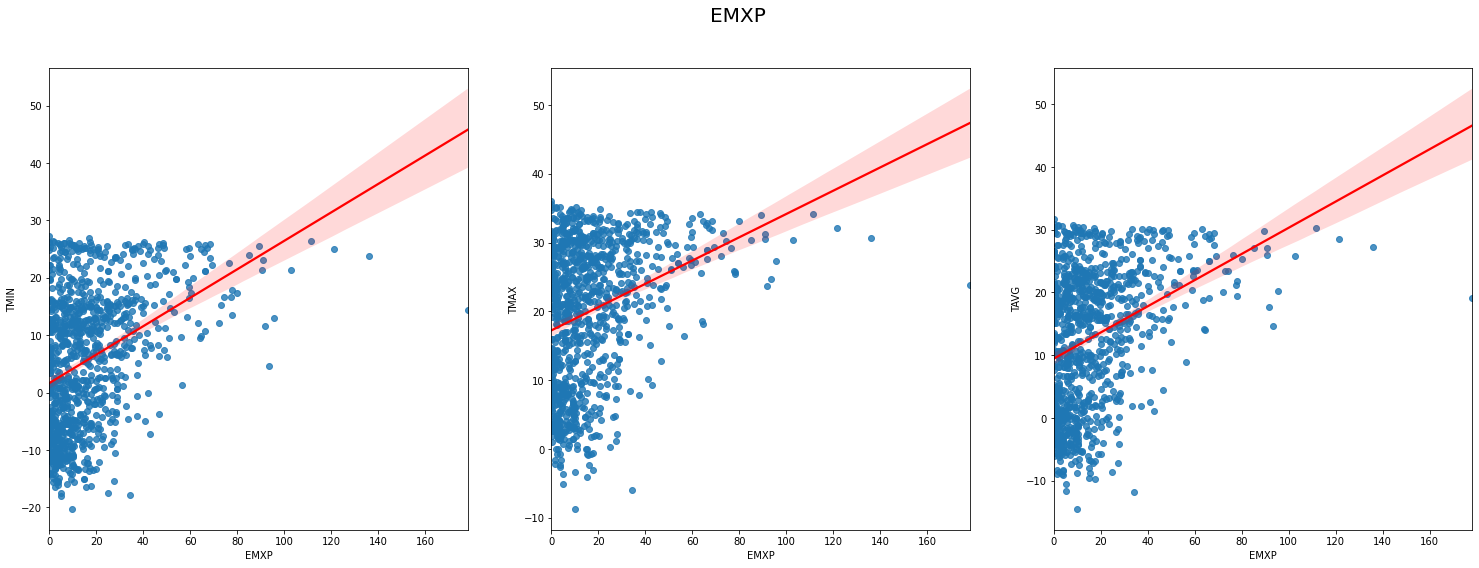

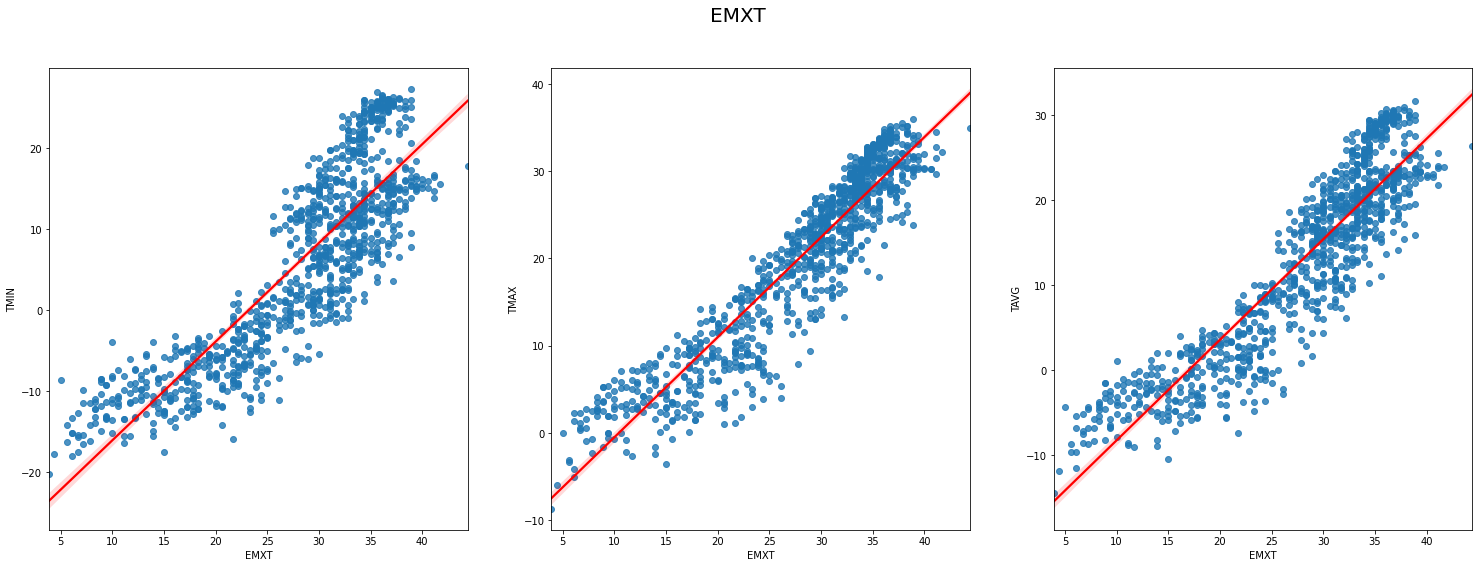

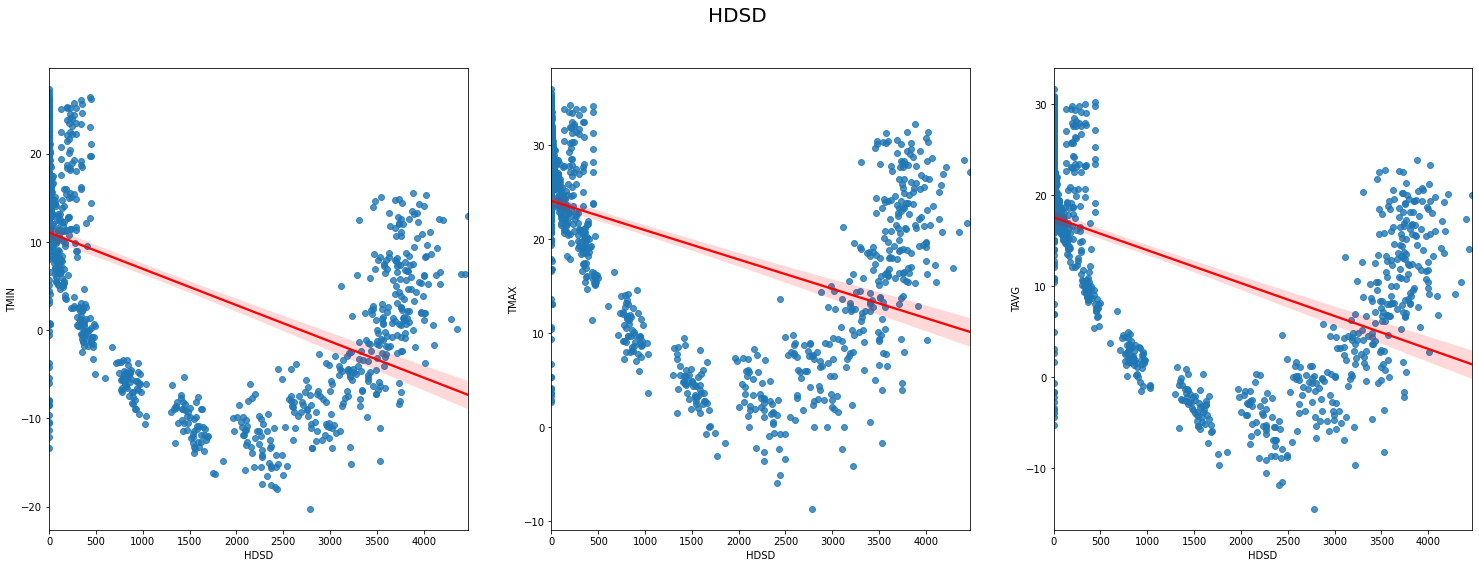

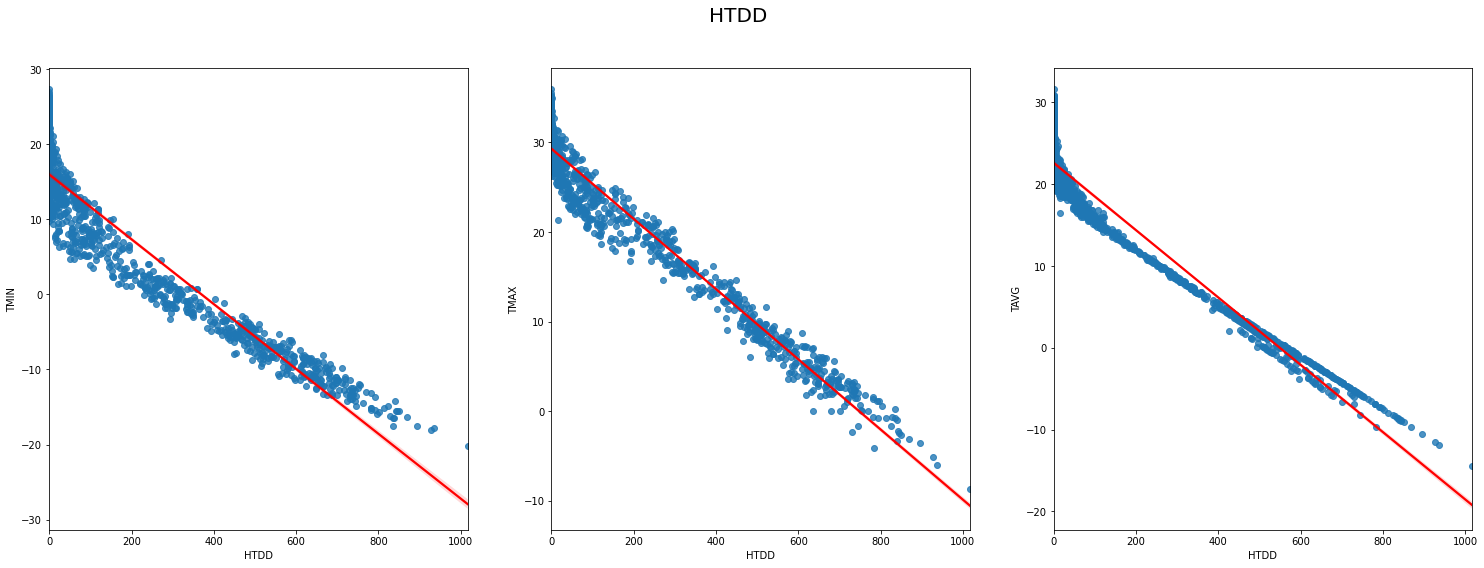

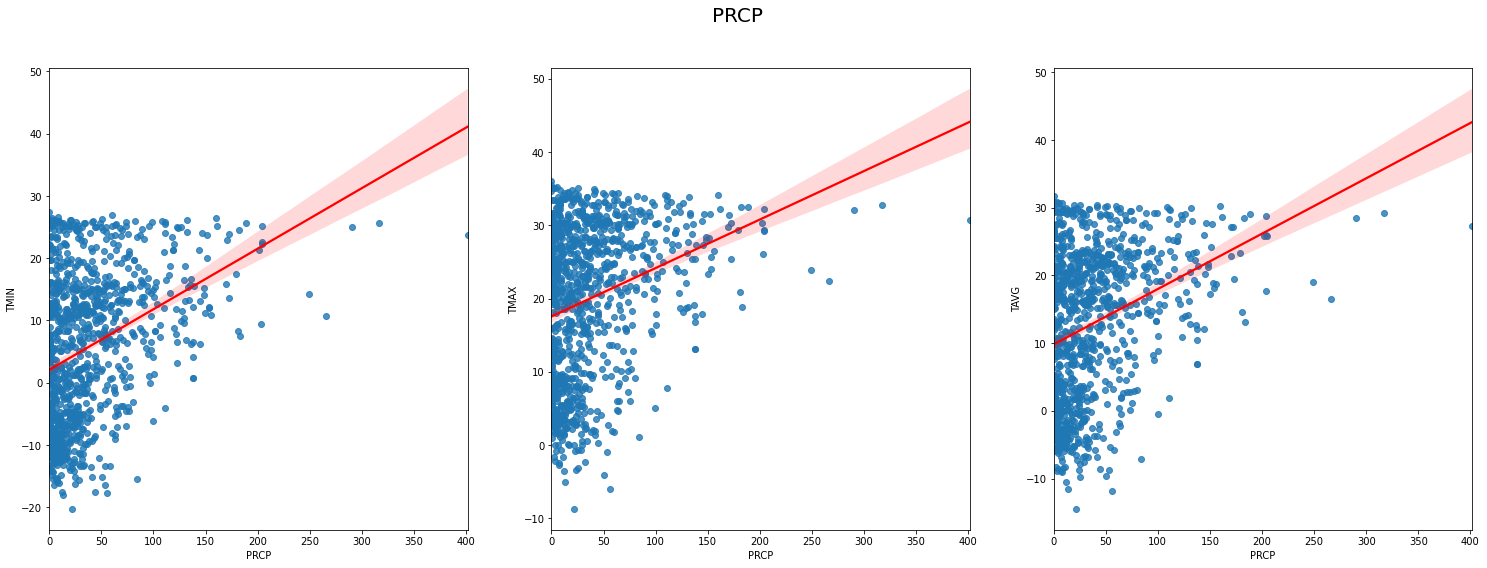

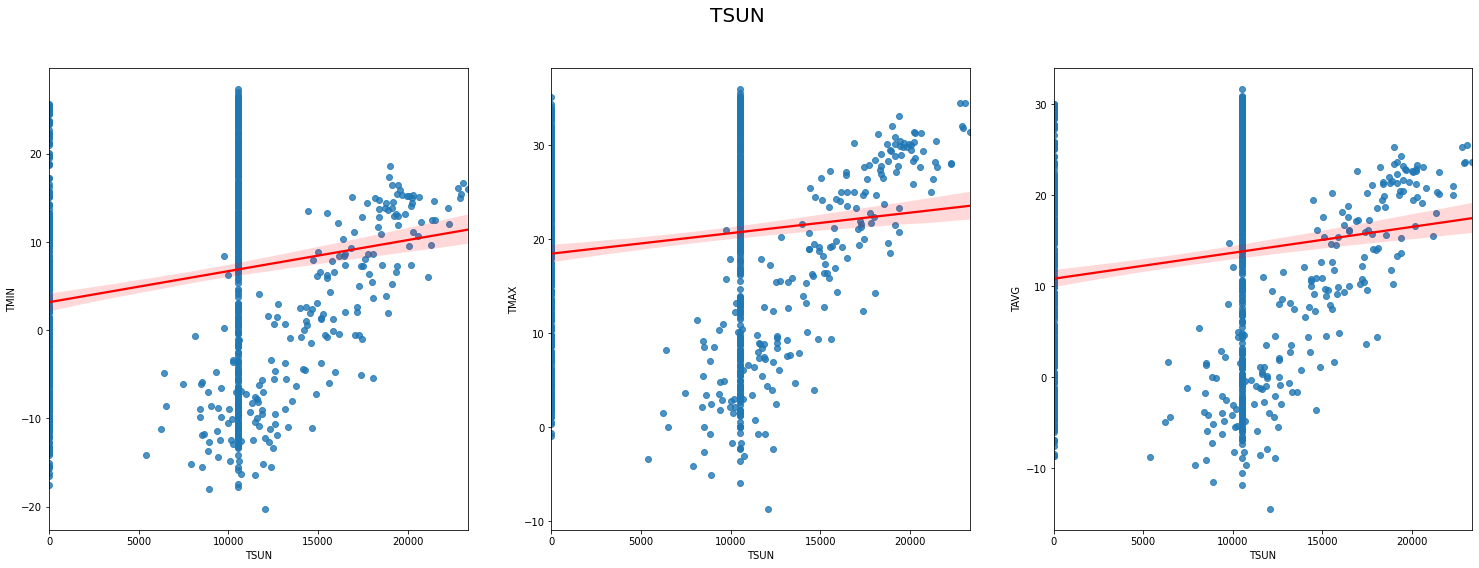

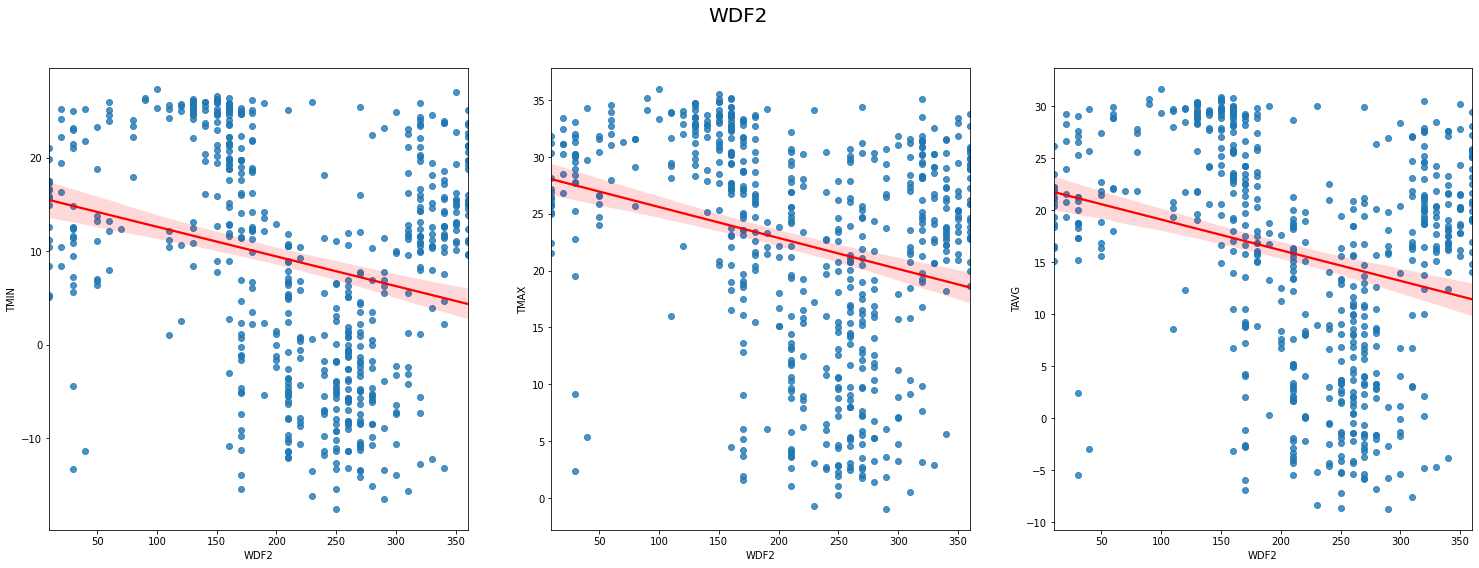

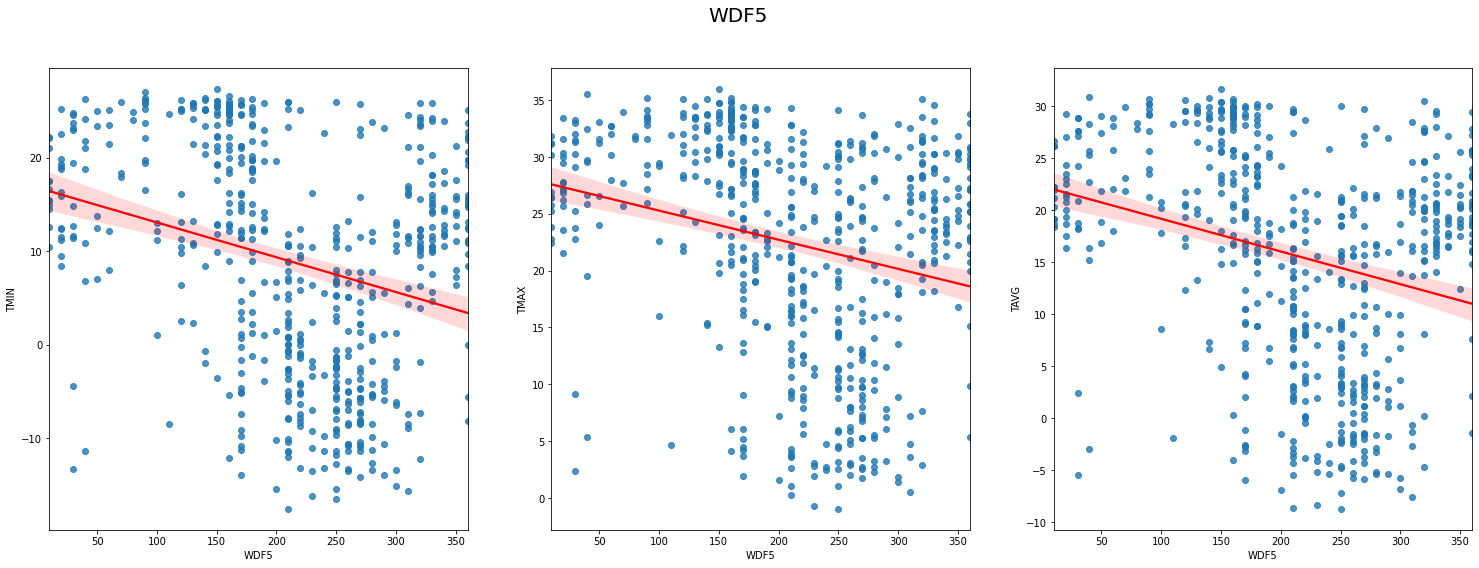

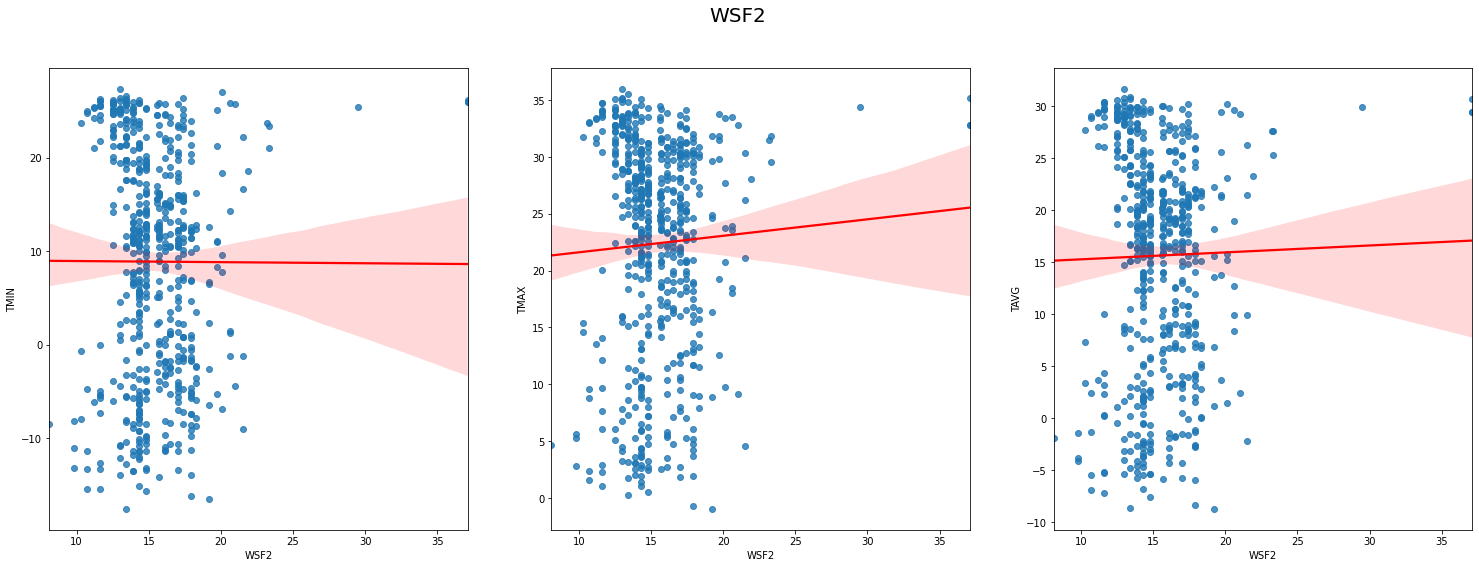

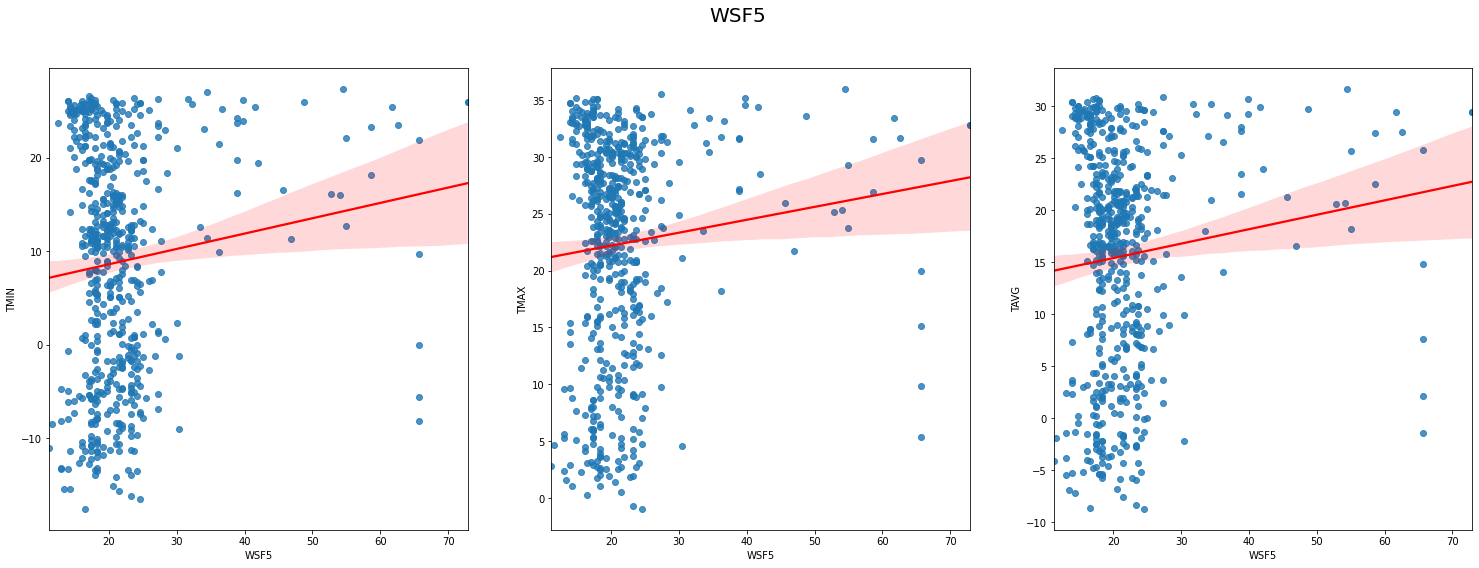

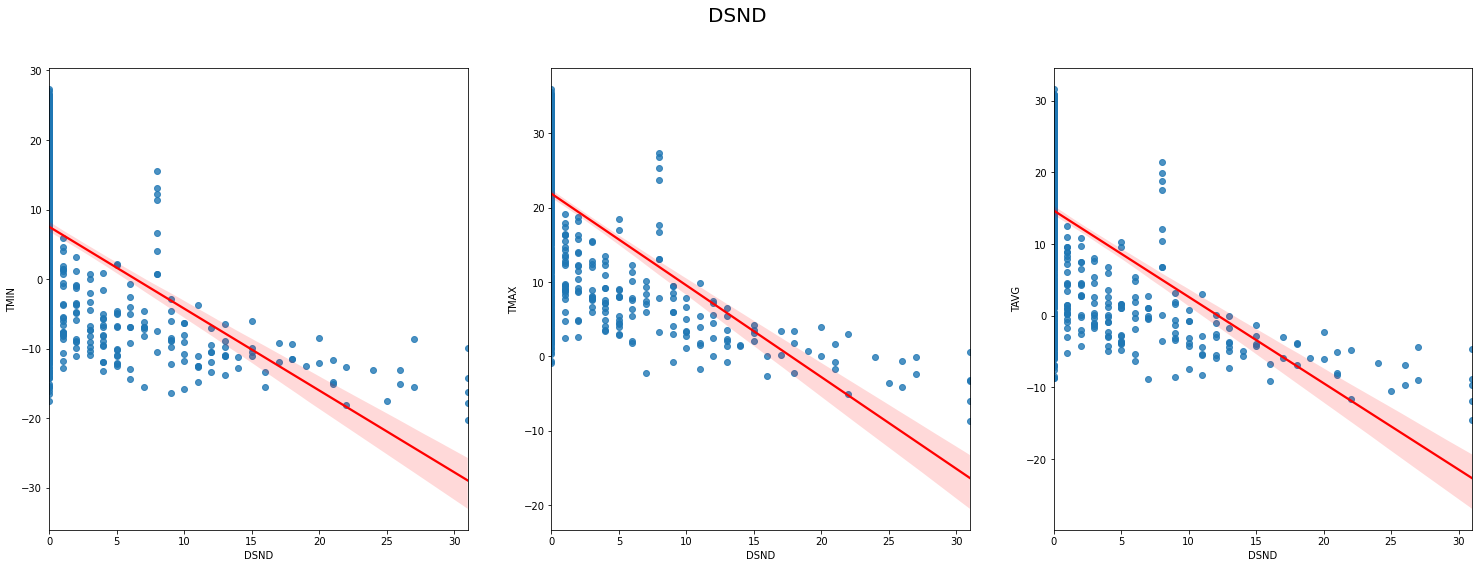

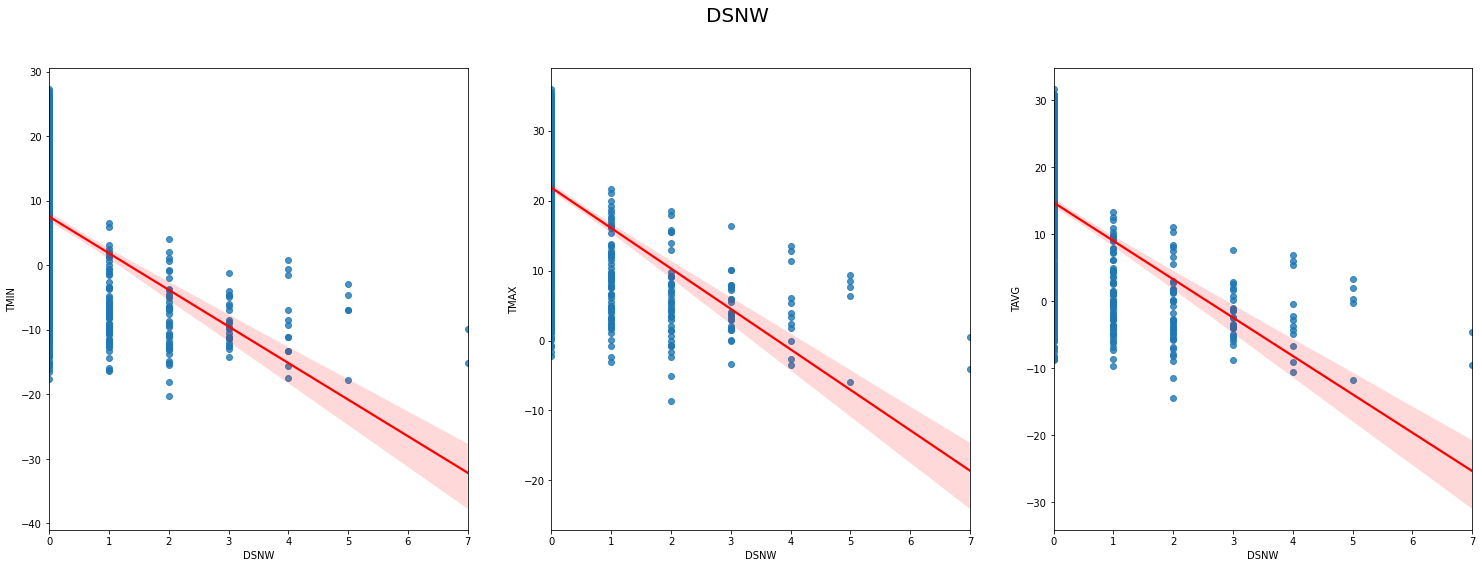

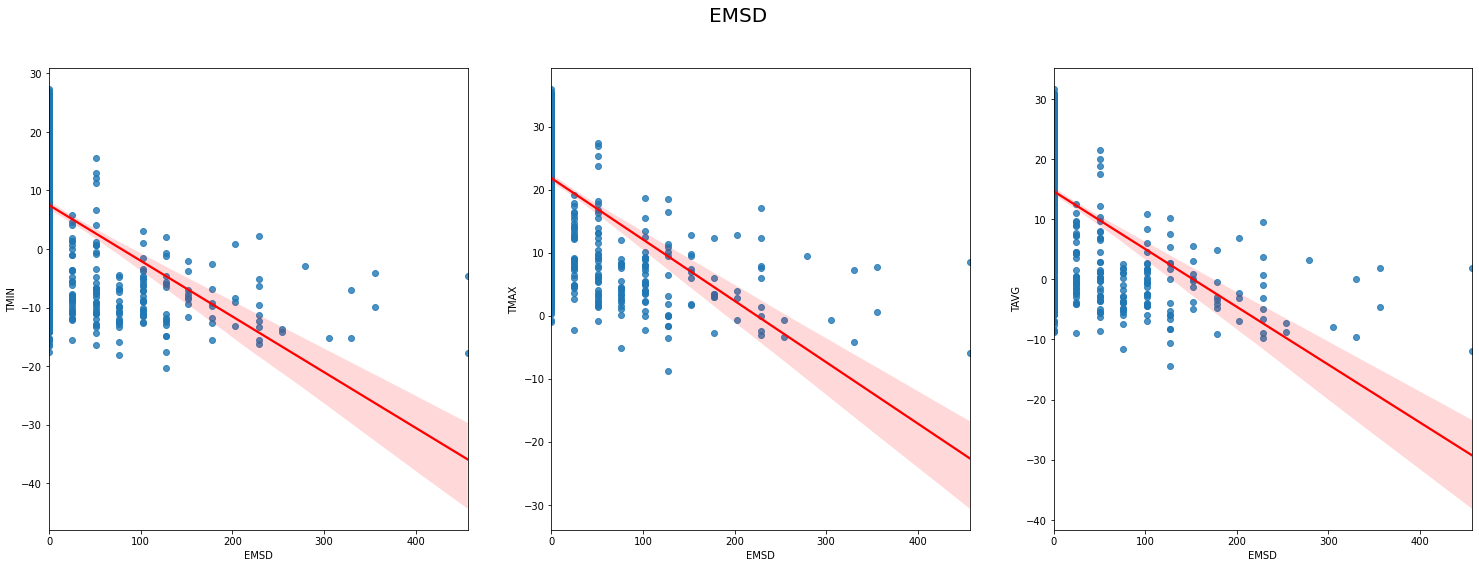

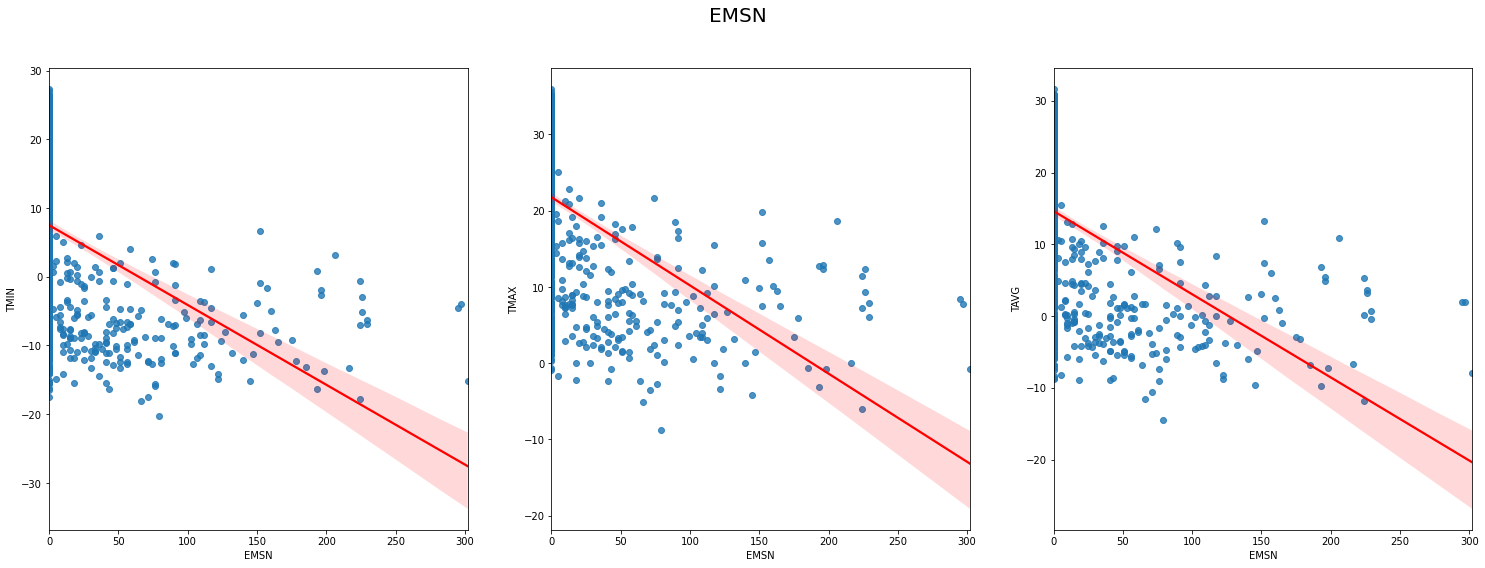

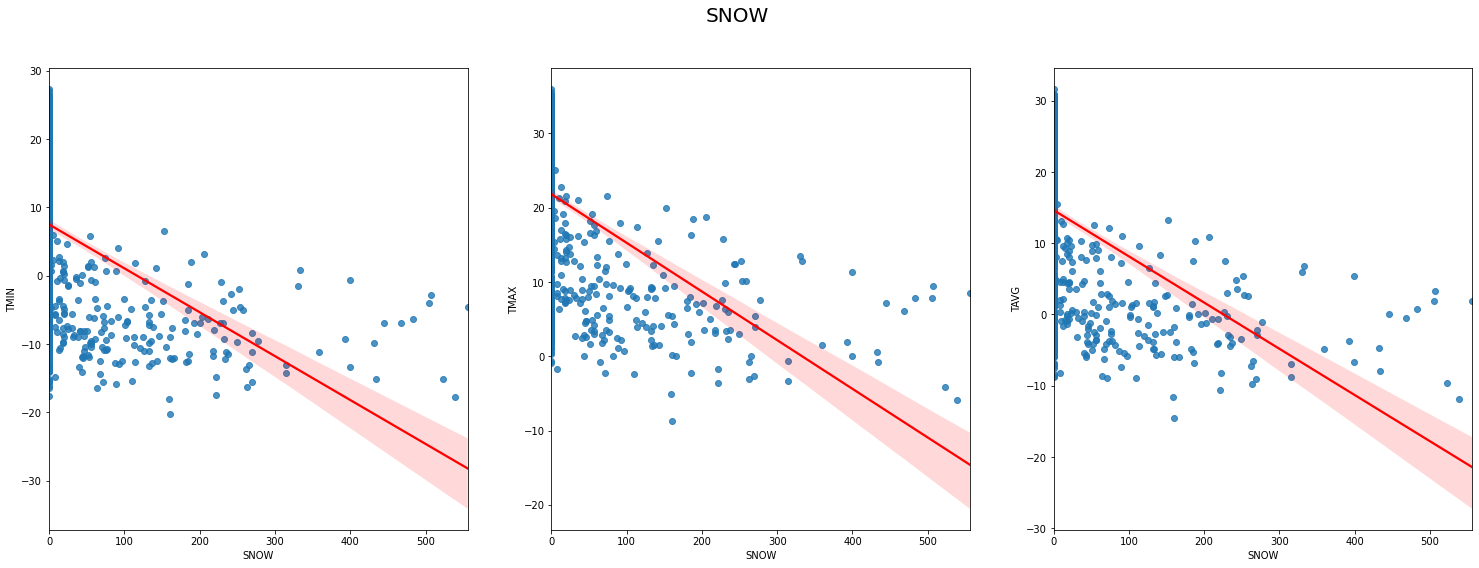

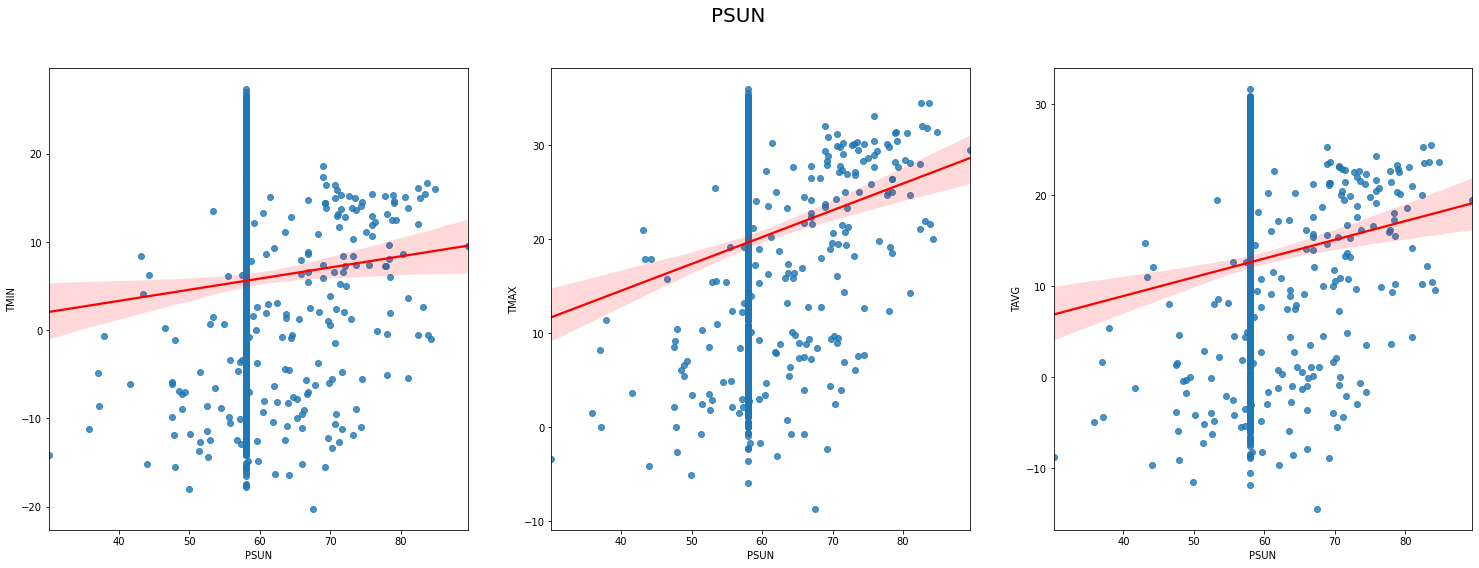

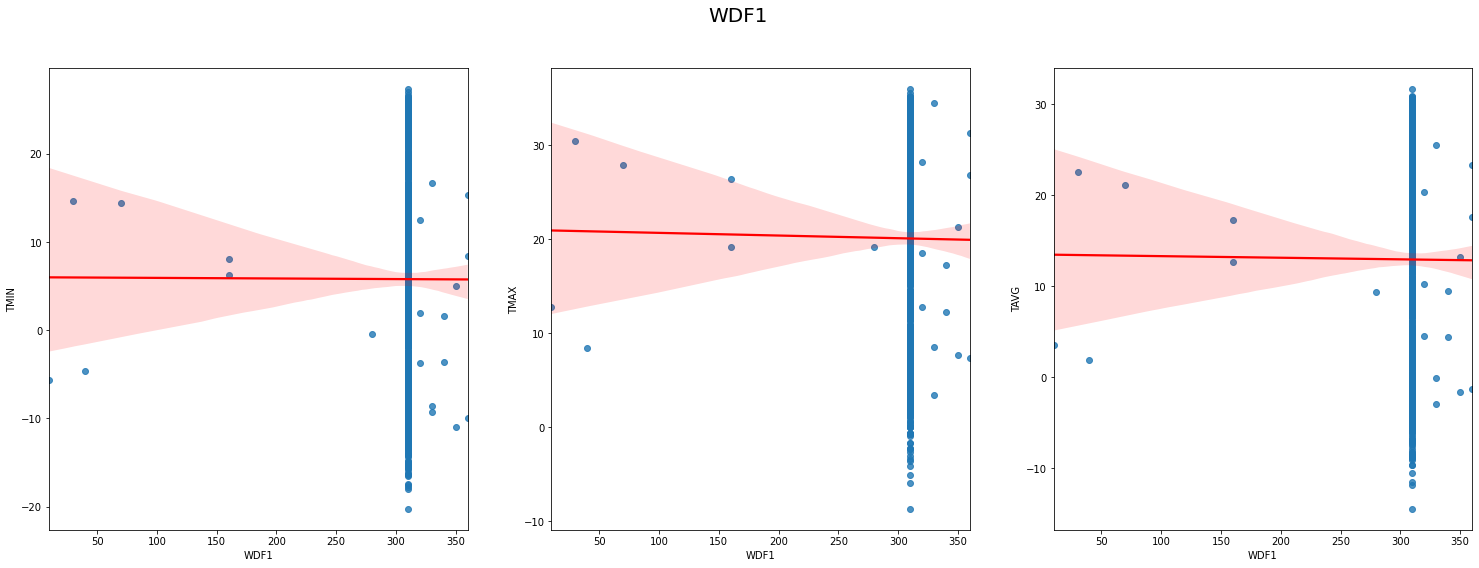

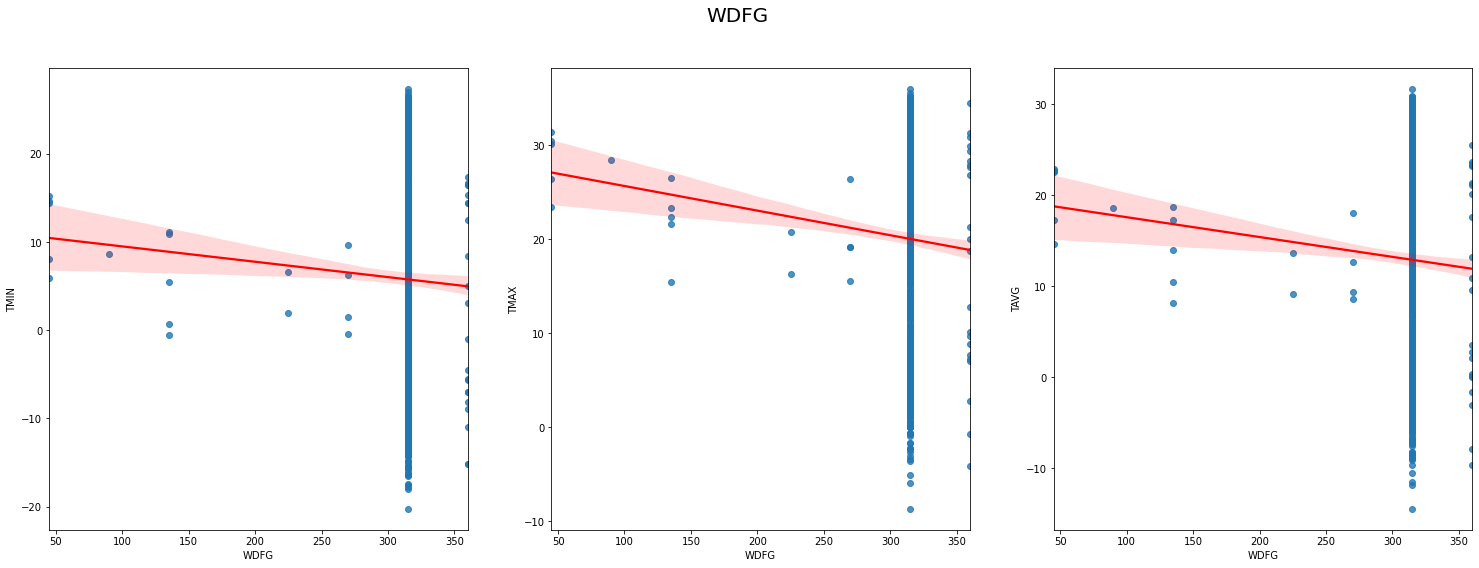

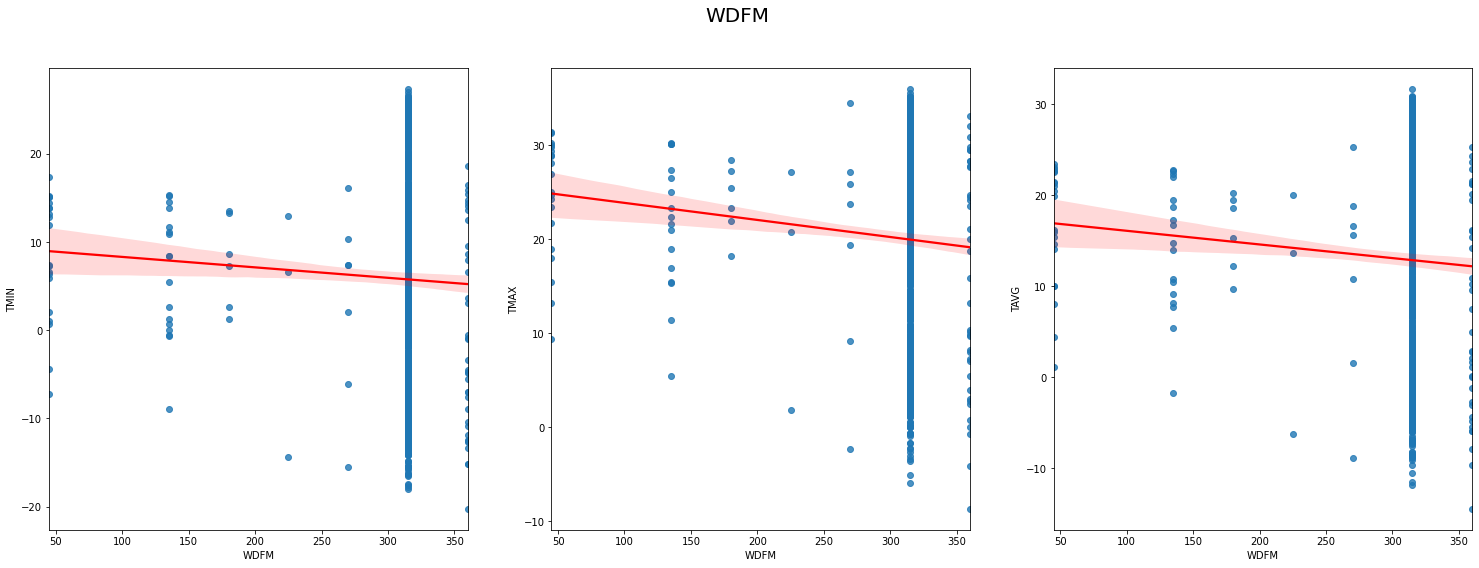

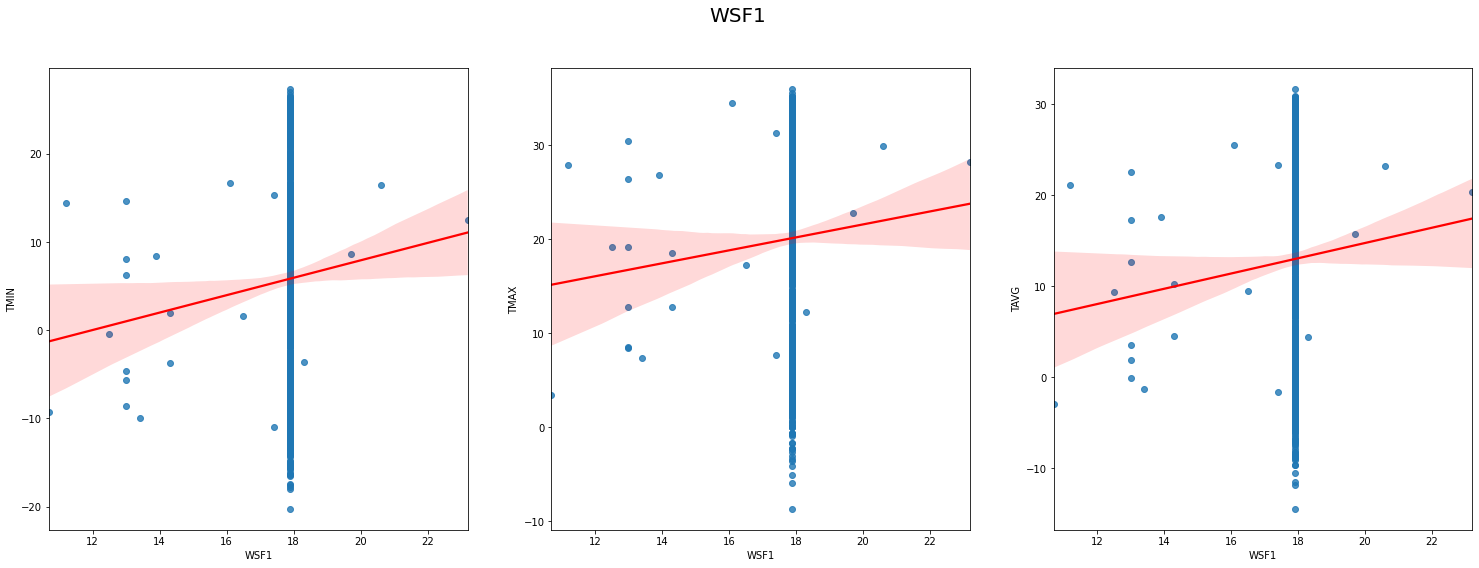

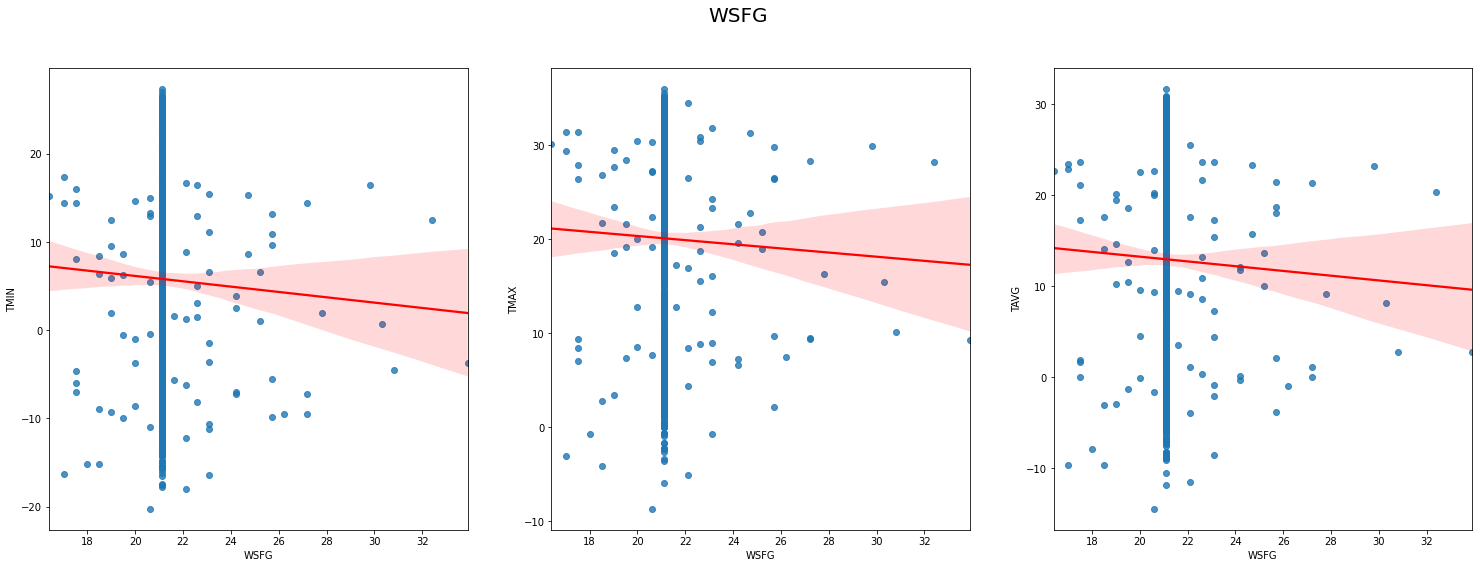

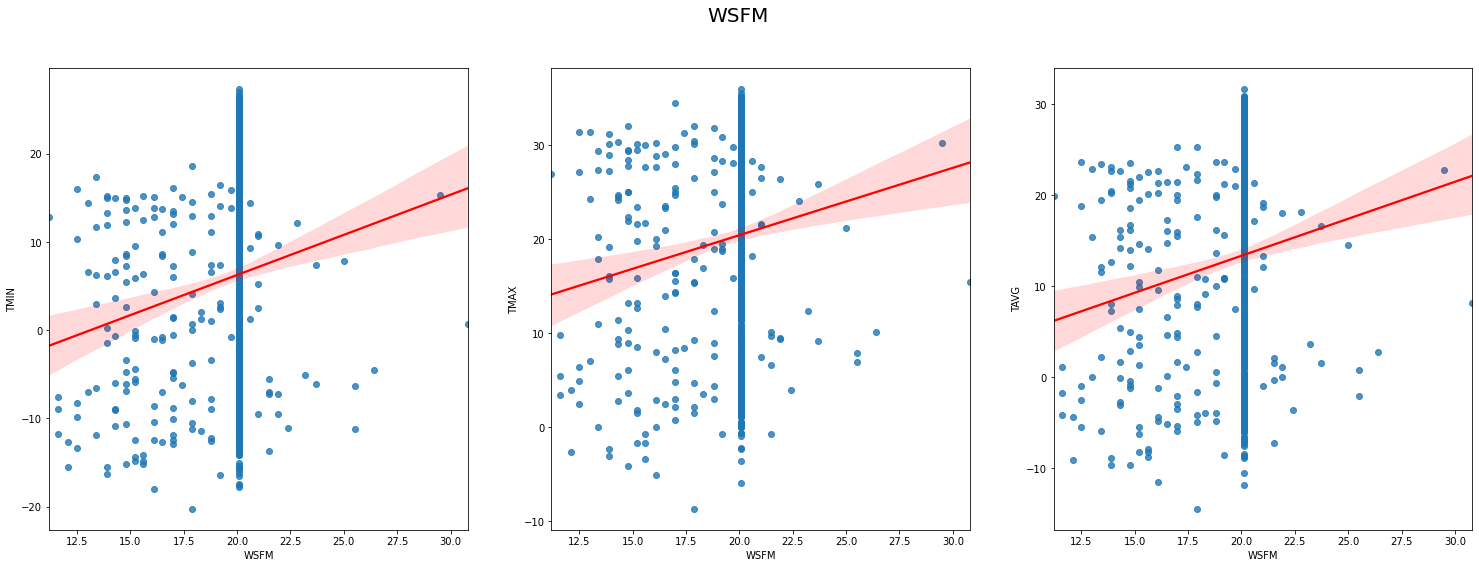

In [9]:
kwargs = {'data':df, 'line_kws':{"color": "red"}}
for valid_col in valid_columns:
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(25.5, 8.5)
    sns.regplot(ax=axes[0], x=valid_col, y="TMIN", **kwargs)
    sns.regplot(ax=axes[1], x=valid_col, y="TMAX", **kwargs)
    sns.regplot(ax=axes[2], x=valid_col, y="TAVG", **kwargs)
    fig.suptitle(valid_col, fontsize=20)